<a href="https://colab.research.google.com/github/K-space-Kishan/Capstone--Zomato-EDA-and-Unsupervised-Machine-Learning/blob/main/Unsupervised_ML_Zomato_Restaurant_Clustering_And_Sentiment_Analysis_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

##### **By- Kumar Kishan**

# **Project Summary -**

**Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.**

**The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in. This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.**

**The project is based on Unsupervised Machine Learning, where our primary purpose is Clusturing and Sentiments Analysis using two data filies. First I proceed by performing EDA on the data. This will give me the insights on the data, by analysisng and visualizing them. After this, I can decide the path I want to take for the Machine Learning.**

**The Machine Learning segment commenced with a meticulous approach to hypothesis testing. This phase involved examining three distinct scenarios, each comprising two hypotheses. For instance, one inquiry delved into the potential relationship between restaurant item costs and their corresponding average ratings. Employing statistical methods, I validated outcomes based on the probabilty where the data would fall.**

**Subsequently, the focus shifted to the implementation of Machine Learning models. Within this phase, we developed three distinct models, each targeting specific facets of the dataset. Following a rigorous training and testing regimen, these models underwent comprehensive evaluation to discern the most efficacious performer among them. This rigorous process not only facilitated model refinement but also offered valuable insights into the nuanced intricacies of the dataset.**

**Overall, the methodical progression from hypothesis formulation and testing to model creation and evaluation epitomizes a systematic and rigorous approach to machine learning implementation. By adhering to this structured methodology, we ensure robustness, reliability, and ultimately, optimal performance of the deployed models.**

# **GitHub Link -**

https://github.com/K-space-Kishan/Capstone--Zomato-EDA-and-Unsupervised-Machine-Learning.git

# **Problem Statement**


Analyzing various facets of the Zomato Restaurant dataset and visually represent them to gain deeper insights for understanding the context and list out the assumptions, testing them and answer few questions (not limited to these) such as:

*   Which are the most popular restaurants grouped by cuisines.
*   Is there any correlation between Cost and Ratings of restaurants.
*   Is there any trend or certainity in fluctuation of ratings all around the year.
*   Form various clusterings to find which number of clusterings fits the most.
*   Based on clusters, make multiple models to train and test, and conclude with the best fitting model.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from numpy import random
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency

#Anamoly detection
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Expand Contraction
!pip install contractions
import contractions
import string

# Remove URLs & Remove words and digits contain digits
import re

# extracting the stopwords from nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#spliting test train
from sklearn.model_selection import train_test_split

#importing kmeans
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import ParameterGrid
from matplotlib import pyplot as plt, cm

#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch

# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from numpy import unique, where
from sklearn.metrics import davies_bouldin_score

#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools

#logisctic regression
from sklearn.linear_model import LogisticRegression

#XgBoost
from xgboost import XGBClassifier

#Visualizing evaluation Metric Score chart for logistic regression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

#Finding the best parameters for LogisticRegression by gridsearchcv
from sklearn.model_selection import GridSearchCV

#Plotting graph
from sklearn.metrics import roc_curve

from scipy.spatial.distance import cosine

#Importing  Cosine Similarity from sklearn
from sklearn.metrics.pairwise import cosine_similarity

!pip install shap
import shap

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Dataset Loading

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
path = "/content/drive/MyDrive/Alma Better/Unsupervised ML - Zomato Restaurant Clustering And Sentiment Analysis  Capstone/Unsupervised ML- Zomato Restaurant Data"
# Using path we load the whole file at once and then load data files as required

df_restaurant_name = pd.read_csv(path + "/Zomato Restaurant names and Metadata.csv")
df_restaurant_review = pd.read_csv(path + "/Zomato Restaurant reviews.csv")

### Dataset First View

In [ ]:
df_restaurant_name

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [ ]:
df_restaurant_review

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


### Dataset Information

In [ ]:
df_restaurant_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
df_restaurant_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


#### Missing Values/Null Values

In [ ]:
Update_restaurant_review= df_restaurant_review
Update_restaurant_review.dropna(inplace=True)
Update_restaurant_review

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


### What did you know about your dataset?

The data is divided into two files, Customer Reviews and Restaurant Names with its details.

The Reviews dataframe contaisn the Reviewer names, the reviews they have given in both numerical and textual form, and the Date & Time of the review posted.

* The reviews and ratings provided by different reviewers offer valuable feedback on the performance of various restaurants.
* The number of reviews and followers associated with each reviewer reflects their level of engagement with the platform.
* The timestamps associated with each review provide insights into temporal trends in reviewer activity and restaurant popularity.
* The metadata accompanying each review, such as the number of reviews and followers, can be indicative of a restaurant's reputation and popularity within the community.
* The presence of pictures in reviews indicates a visual element in the feedback provided by reviewers.

The Restaurant's Name dataframe contains the names of each restaurant and the names of cusines it serves, provided with the timmings of the restuarants.

The dataset includes information on the cost range for dining at each restaurant, which varies from as low as ₹200 to as high as ₹1,700.
* Some restaurants are associated with specific collections or categories, such as "Food Hygiene Rated Restaurants," "Late Night Restaurants," "Best Bars & Pubs," and "Fast Food," indicating the diverse offerings and specialties within the city's culinary landscape.
* Hyderabad boasts a diverse culinary scene, as evidenced by the wide array of cuisines offered by the restaurants in the dataset.
* The dataset provides information on the operational hours of each restaurant, showcasing the availability of dining options throughout the day.
* Each restaurant is associated with a link, presumably to its profile on an online platform like Zomato, facilitating access to additional information and reviews.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Update_restaurant_review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
df_restaurant_name.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
Update_restaurant_review.insert(loc=Update_restaurant_review.columns.get_loc('Time'), column='Date', value=Update_restaurant_review['Time'].str.split().str[0])
Update_restaurant_review.insert(loc=Update_restaurant_review.columns.get_loc('Time'), column='Month', value=Update_restaurant_review['Time'].str.split().str[0])
Update_restaurant_review.insert(loc=Update_restaurant_review.columns.get_loc('Time'), column='Year', value=Update_restaurant_review['Time'].str.split().str[0])
Update_restaurant_review.insert(loc=Update_restaurant_review.columns.get_loc('Metadata'), column='Count_Review', value=Update_restaurant_review['Metadata'].str.split(',').str[0])
Update_restaurant_review.insert(loc=Update_restaurant_review.columns.get_loc('Metadata'), column='Count_Followers', value=Update_restaurant_review['Metadata'].str.split(',').str[1])

In [ ]:
# Extracting the portion of the strings after '2019'
Update_restaurant_review['Time'] = Update_restaurant_review['Time'].apply(lambda x: str(x).split()[-1])
Update_restaurant_review['Time']

0       15:54
1       14:20
2       22:54
3       22:11
4       21:37
        ...  
9995     0:08
9996    22:01
9997    10:37
9998    17:22
9999    16:41
Name: Time, Length: 9955, dtype: object

In [ ]:
Update_restaurant_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant       9955 non-null   object
 1   Reviewer         9955 non-null   object
 2   Review           9955 non-null   object
 3   Rating           9955 non-null   object
 4   Count_Review     9955 non-null   object
 5   Count_Followers  8381 non-null   object
 6   Metadata         9955 non-null   object
 7   Date             9955 non-null   object
 8   Month            9955 non-null   object
 9   Year             9955 non-null   object
 10  Time             9955 non-null   object
 11  Pictures         9955 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 1.2+ MB


In [ ]:
Update_restaurant_review['Date'] = Update_restaurant_review['Date'].str.replace('-', '/')
Update_restaurant_review['Month'] = Update_restaurant_review['Month'].str.replace('-', '/')
Update_restaurant_review['Year'] = Update_restaurant_review['Year'].str.replace('-', '/')
Update_restaurant_review['Date'] = pd.to_datetime(Update_restaurant_review['Date'], format='%m/%d/%Y')
Update_restaurant_review['Month'] = pd.to_datetime(Update_restaurant_review['Month'], format='%m/%d/%Y')
Update_restaurant_review['Year'] = pd.to_datetime(Update_restaurant_review['Year'], format='%m/%d/%Y')
Update_restaurant_review['Time'] = pd.to_datetime(Update_restaurant_review['Time'], format='%H:%M').dt.time
# Extract only the Month and Year part
Update_restaurant_review['Month'] = Update_restaurant_review['Month'].dt.month
Update_restaurant_review['Year'] = Update_restaurant_review['Year'].dt.year

In [ ]:
# Remove 'Review' or 'Reviews' and keep only the numerical part in Count_Review
Update_restaurant_review['Count_Review'] = Update_restaurant_review['Count_Review'].str.extract('(\d+)').astype(int)

# Fill NaN values in Count_Followers with '0 Followers'
Update_restaurant_review['Count_Followers'].fillna('0 Followers', inplace=True)

# Remove 'Review' or 'Reviews' and keep only the numerical part in Count_Followers
Update_restaurant_review['Count_Followers'] = Update_restaurant_review['Count_Followers'].str.extract('(\d+)').astype(int)

In [ ]:
Update_restaurant_review

,Restaurant,Reviewer,Review,Rating,Count_Review,Count_Followers,Metadata,Date,Month,Year,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,1,2,"1 Review , 2 Followers",2019-05-25,5,2019,15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,3,2,"3 Reviews , 2 Followers",2019-05-25,5,2019,14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,2,3,"2 Reviews , 3 Followers",2019-05-24,5,2019,22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,1,1,"1 Review , 1 Follower",2019-05-24,5,2019,22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,3,2,"3 Reviews , 2 Followers",2019-05-24,5,2019,21:37:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,53,54,"53 Reviews , 54 Followers",2016-06-05,6,2016,00:08:00,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2,53,"2 Reviews , 53 Followers",2016-06-04,6,2016,22:01:00,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,65,423,"65 Reviews , 423 Followers",2016-06-03,6,2016,10:37:00,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,13,144,"13 Reviews , 144 Followers",2016-05-31,5,2016,17:22:00,0


In [ ]:
Update_restaurant_review['Rating'] = Update_restaurant_review['Rating'].replace('Like', 4)
Update_restaurant_review['Rating'] = pd.to_numeric(Update_restaurant_review['Rating'])
Update_restaurant_review['Count_Review'] = pd.to_numeric(Update_restaurant_review['Count_Review'])
Update_restaurant_review['Count_Followers'] = pd.to_numeric(Update_restaurant_review['Count_Followers'])
# Calculate mean rating for each distinct restaurant
mean_rating_by_restaurant = Update_restaurant_review.groupby('Restaurant')['Rating'].mean().round(1)
mean_rating_by_restaurant

Restaurant
10 Downing Street                        3.8
13 Dhaba                                 3.5
3B's - Buddies, Bar & Barbecue           4.8
AB's - Absolute Barbecues                4.9
Absolute Sizzlers                        3.6
                                        ... 
Urban Asia - Kitchen & Bar               3.6
Yum Yum Tree - The Arabian Food Court    3.6
Zega - Sheraton Hyderabad Hotel          4.4
Zing's Northeast Kitchen                 3.6
eat.fit                                  3.2
Name: Rating, Length: 100, dtype: float64

In [ ]:
# Merge df_restaurant_name with mean_rating_by_restaurant on 'Name' column
Update_restaurant_name = df_restaurant_name.merge(mean_rating_by_restaurant, left_on='Name', right_index=True, how='left')

# Rename the merged column to 'Rating'
Update_restaurant_name.rename(columns={'Rating_y': 'Rating'}, inplace=True)

# Convert 'Cost' column to numeric
Update_restaurant_name['Cost'] = Update_restaurant_name['Cost'].str.replace(',', '').astype(float)

# Display the updated dataframe
Update_restaurant_name

,Name,Links,Cost,Collections,Cuisines,Timings,Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.3
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,4.7
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300.0,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4.7
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,3.2
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",4.3
...,...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600.0,NaN,"Fast Food, Salad",11 AM to 11 PM,NaN
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200.0,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",NaN
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500.0,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM,NaN
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250.0,NaN,Fast Food,8am to 12:30AM (Mon-Sun),NaN


In [ ]:
unique_cuisines = Update_restaurant_name['Cuisines'].unique()
unique_cuisines

array(['Chinese, Continental, Kebab, European, South Indian, North Indian',
       'Biryani, North Indian, Chinese',
       'Asian, Mediterranean, North Indian, Desserts',
       'Biryani, North Indian, Chinese, Seafood, Beverages',
       'Asian, Continental, North Indian, Chinese, Mediterranean',
       'Seafood, Goan, North Indian, Continental, Asian',
       'Healthy Food, North Indian, Continental, South Indian',
       'Lebanese', 'American, Chinese, North Indian, Kebab, South Indian',
       'Ice Cream, Desserts', 'Street Food, North Indian, Fast Food',
       'Mediterranean, North Indian, Kebab, BBQ',
       'Continental, American, Chinese',
       'North Indian, Italian, Finger Food',
       'European, Mediterranean, North Indian', 'Burger, Fast Food',
       'North Indian', 'Chinese, North Indian',
       'North Indian, Chinese, Continental',
       'North Indian, Chinese, Biryani',
       'North Indian, Japanese, Italian, Salad, Sushi', 'American',
       'Continental', 'Mex

In [ ]:
# Splitting the 'Cuisines' column into separate cuisines and stacking them
cuisine_series = Update_restaurant_name['Cuisines'].str.split(', ', expand=True).stack()

# Resetting the index to match the length of the series
cuisine_series.index = cuisine_series.index.droplevel(-1)

# Creating a new DataFrame with separated cuisines
df_cuisine = pd.DataFrame(cuisine_series, columns=['Cuisine'])

# Merging the original DataFrame with the new cuisine DataFrame
df_merged = pd.merge(Update_restaurant_name, df_cuisine, left_index=True, right_index=True)

# Grouping by cuisine
grouped_by_cuisine = df_merged.groupby('Cuisine')

for cuisine, group in grouped_by_cuisine:
    print("Cuisine:", cuisine)

    # Sorting restaurants within each cuisine group by 'Rating' in descending order
    sorted_group = group.sort_values(by='Rating', ascending=False)

    for index, row in sorted_group.iterrows():
        print("Name:", row['Name'], "| Cost:", row['Cost'], "| Rating:", row['Rating'])

    print()

Cuisine: American
Name: B-Dubs | Cost: 1600.0 | Rating: 4.8
Name: GD's | Cost: 500.0 | Rating: 4.0
Name: American Wild Wings | Cost: 600.0 | Rating: 4.0
Name: Hyper Local | Cost: 1000.0 | Rating: 3.6
Name: Absolute Sizzlers | Cost: 750.0 | Rating: 3.6
Name: The Foodie Monster Kitchen | Cost: 500.0 | Rating: 3.6

Cuisine: Andhra
Name: Banana Leaf Multicuisine Restaurant | Cost: 700.0 | Rating: 3.7
Name: Kritunga Restaurant | Cost: 500.0 | Rating: 3.5
Name: Pot Pourri | Cost: 900.0 | Rating: 3.3
Name: Owm Nom Nom | Cost: 900.0 | Rating: 3.3
Name: Ulavacharu | Cost: 1400.0 | Rating: 3.2
Name: T Grill | Cost: 700.0 | Rating: 3.2

Cuisine: Arabian
Name: Marsala Food Company | Cost: 700.0 | Rating: 3.5
Name: Mohammedia Shawarma | Cost: 150.0 | Rating: 3.0

Cuisine: Asian
Name: Flechazo | Cost: 1300.0 | Rating: 4.7
Name: The Indi Grill | Cost: 1500.0 | Rating: 4.6
Name: Zega - Sheraton Hyderabad Hotel | Cost: 1750.0 | Rating: 4.4
Name: Over The Moon Brew Company | Cost: 1200.0 | Rating: 4.3
N

### What all manipulations have you done and insights you found?

The data were divided into two different dataframes. First we need to group the data which will give us meaningful data which can be  further analysed and visualized.

Columns like Cost and Rating are merged with the rsetaurant's names, and then grouping the Restaurants by the distinct cusines they offer.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

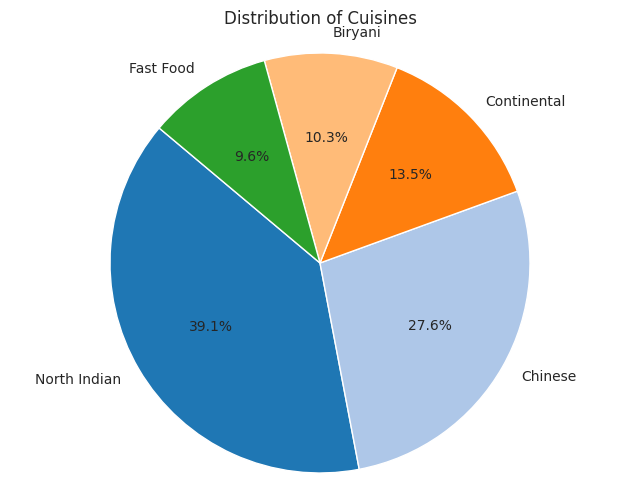

In [ ]:
# Count occurrences of each cuisine
cuisine_counts = df_merged['Cuisine'].value_counts()

cuisine_counts_top_5= cuisine_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 6))
cuisine_counts_top_5.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Cuisines')
plt.ylabel('')  # Remove y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### **Observation**:
1. The above illustretion gives the insight of the Top 5 cusinies which are most offered by the restaurants.

2. This pie distribution shows that North Indian Cuisines are most offered showing 39% distribution, followed by 27% chinese cusines.

3. Other cuisines such as 'Fast Food', 'Continental', 'Biryani' share significantly low distributions.

4. The distribution of cuisines majorly depends on the choices of the customer, thereby showing that customers tends to ask for North Indian and Chinies cuisines more often.

#### Chart - 2

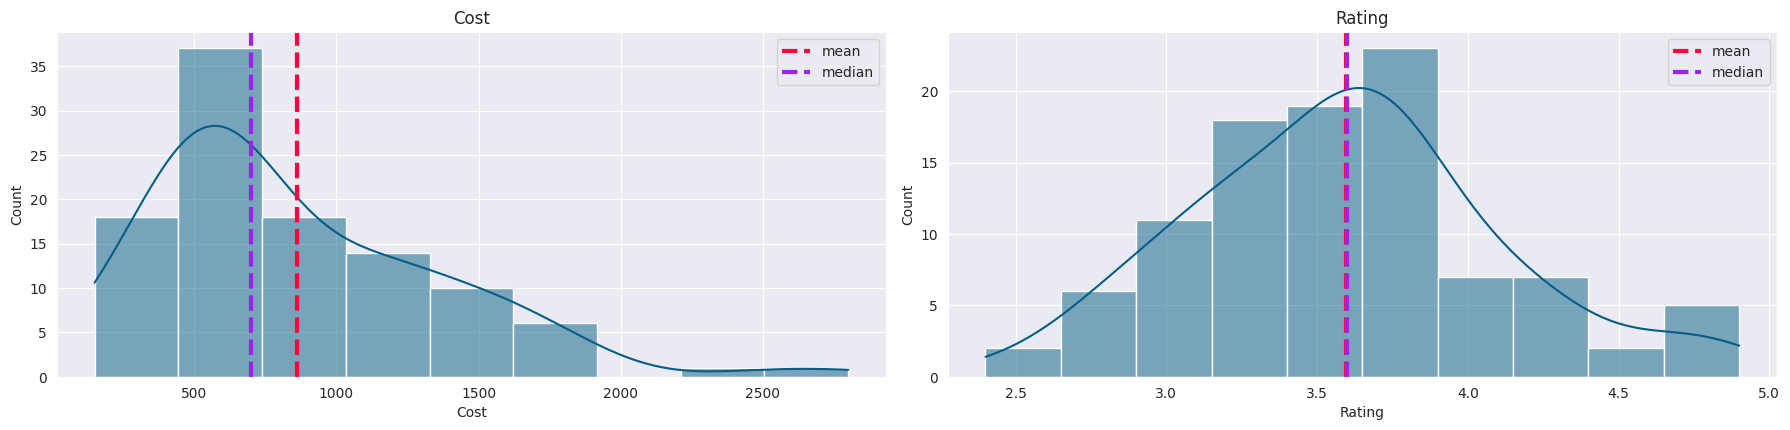

In [ ]:
plt.figure(figsize=(18, 8))
for i, col in enumerate(['Cost', 'Rating']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(Update_restaurant_name[col], color='#055E85', kde=True)
    plt.axvline(Update_restaurant_name[col].mean(), color='#ff033e', linestyle='dashed', linewidth=3, label='mean')  # red
    plt.axvline(Update_restaurant_name[col].median(), color='#A020F0', linestyle='dashed', linewidth=3, label='median')  # cyan
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper right')
    plt.title(f'{col.title()}')
    plt.tight_layout()

plt.show()

### **Observation**:
The above plot is used for giving the insight of is the data distributed. And it clearly shows that the 'Cost' is highly left skwed, but on the other hand the 'Rating' is symetric skwed. This understanding will help us in later part of the ML Modeling where I have to balance the data.

#### Chart - 3

<ipython-input-271-1d7223a37d83>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_cost_restaurants.values, y=highest_cost_restaurants.index, palette='viridis')


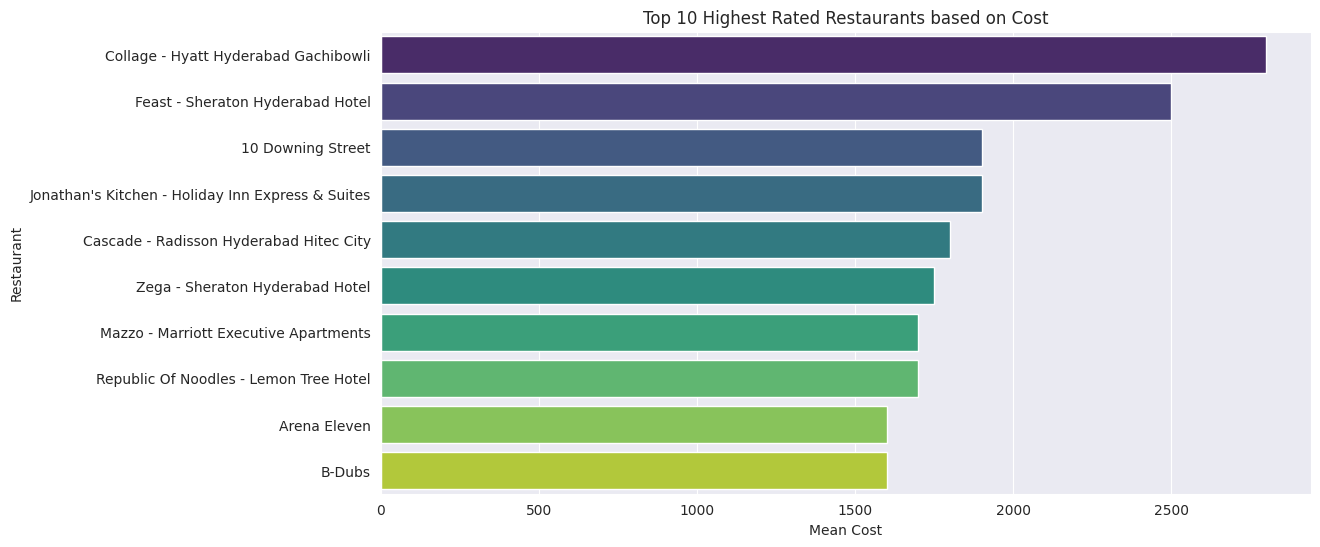

In [ ]:
# Calculate mean cost for each restaurant
mean_cost_per_restaurant = Update_restaurant_name.groupby('Name')['Cost'].mean()

# Sort restaurants based on mean cost and get the top 10 highest-rated restaurants
highest_cost_restaurants = mean_cost_per_restaurant.nlargest(10)

# Plotting the top 10 highest-rated restaurants based on cost
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_cost_restaurants.values, y=highest_cost_restaurants.index, palette='viridis')
plt.xlabel('Mean Cost')
plt.ylabel('Restaurant')
plt.title('Top 10 Highest Rated Restaurants based on Cost')
plt.show()

### **Obseravtion**:
1. The above plot showcases the Top 10 Highest Rated Restaurants based on Cost. Here the restaurants are first grouped with respect to their ratings and then sorted by the mean Cost in descending order.

2. From this we can make out that Collage- Hyatt Hyderabad Gachibowli is the one of the Top rated rsetaurant with highest mean costs, while B-Dubs is one of the highest rated with least mean cost restaurant.

#### Chart - 4

<ipython-input-272-46fd442a94a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisine', y='Cost', data=df_merged, medianprops={'color': 'red'}, showmeans=True, palette='viridis')


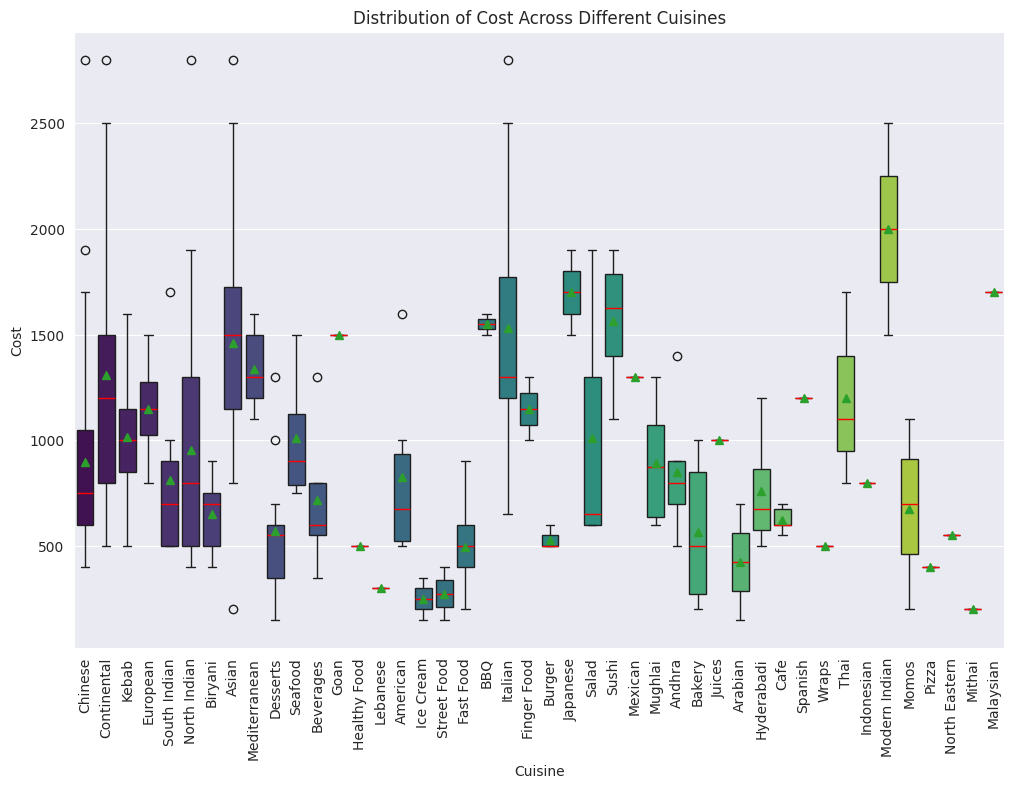

In [ ]:
# Create a violin plot with a vibrant color palette
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cuisine', y='Cost', data=df_merged, medianprops={'color': 'red'}, showmeans=True, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Cost Across Different Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Cost')
plt.show()


### **Obseravtion:**
Above visualization shows the price range of each cuisines by help of box plot.
1. It can easily identified that there are some cuisines whose price range is very small, few are expensive in all restauarants.
For instance, 'Continental', 'Asian', and 'Italian' cuisines manifest substantial price fluctuations, reaching up to Rs. 2000 across different restaurants.

2. While most price distributions adhere to typical ranges, outliers are discernible, depicting exceptional high or low-priced offerings by select restaurants.
3. The red line represents the 50th percentile, offering a median reference point, while the green triangle signifies the mean cost.

#### Chart - 5

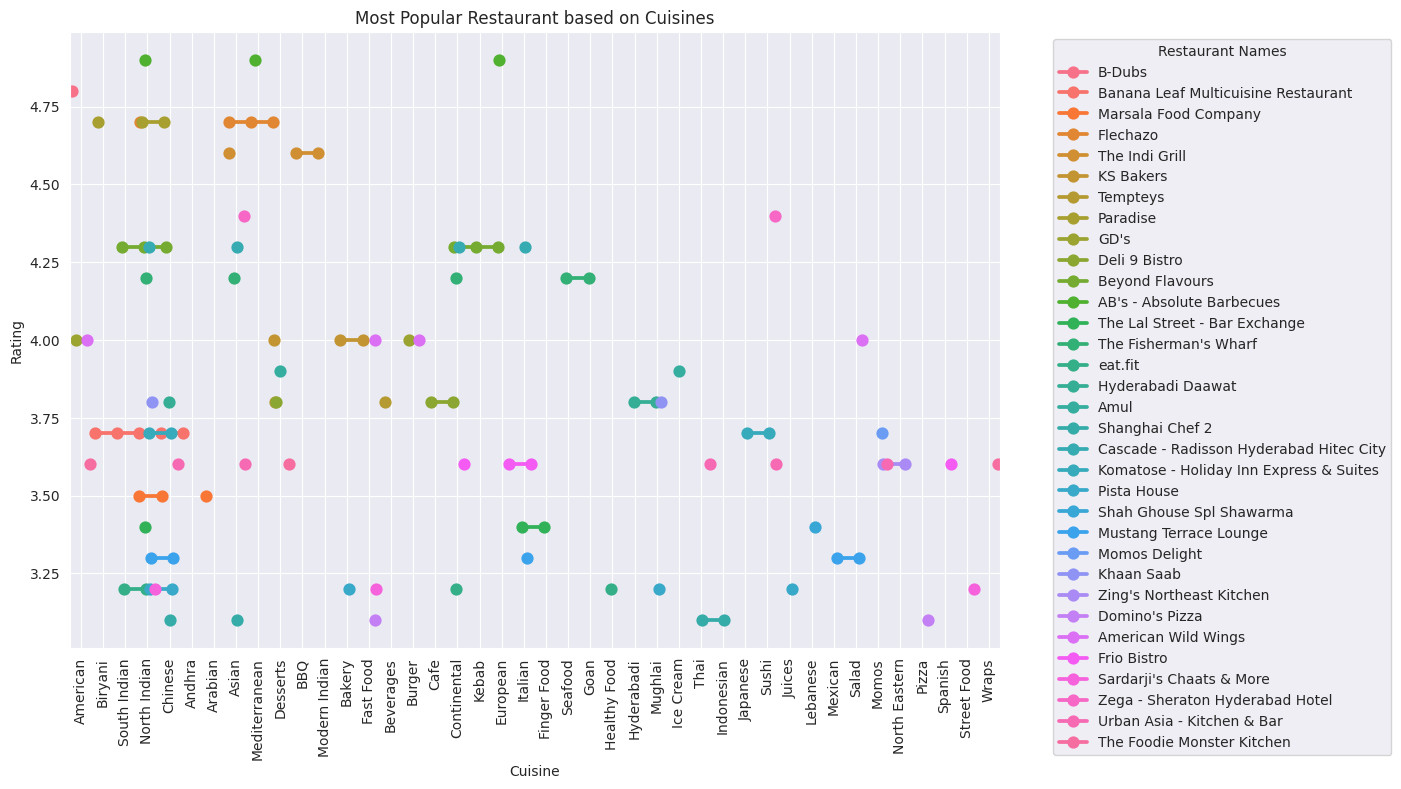

In [ ]:
# Drop rows with NaN values in the 'Rating' column
df_cleaned = df_merged.dropna(subset=['Rating'])

# Find the most popular restaurant within each cuisine group
most_popular_restaurants = df_cleaned.loc[df_cleaned.groupby('Cuisine')['Rating'].idxmax()]

plt.figure(figsize=(12, 8))
sns.pointplot(x='Cuisine', y='Rating', hue='Name', data=most_popular_restaurants, dodge=True)
plt.xticks(rotation=90)
plt.title('Most Popular Restaurant based on Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.grid(True)
plt.legend(title='Restaurant Names', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Observation:**
The plot shows most Popular Restaurants grouped by Cuisines.

1. From plot we can see which restuarants are high rested in specific cuisine. For ex. for American cuisine it shows that B-Dubs, GD's restaurants have high ratings, 4.75 and 4 respectively.

2. Whereas for Asian cuisine Flachazo restaurant is favoured the most by the customers but Cascade is not so favoured by the customers.

3. It is notable that most of the restaurants tends to sevre cuisines from 'American' to 'Italian'. Rest other cuisines are less served, also their raings are mostly average.

#### Chart - 6

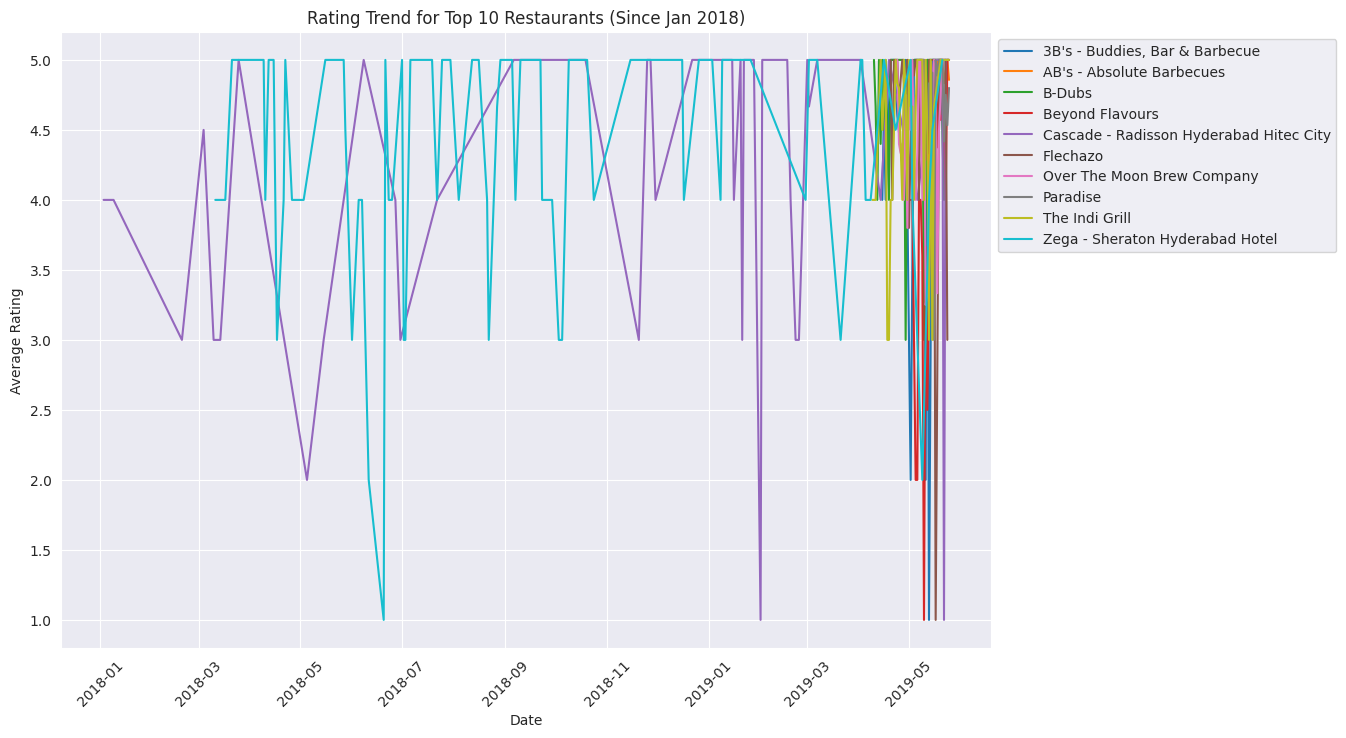

In [ ]:
# Filter the data to include only reviews from January 2018 onwards
start_date = '2018-01-01'
filtered_df = Update_restaurant_review[Update_restaurant_review['Date'] >= start_date]

# Calculate mean rating for each restaurant
mean_rating_by_restaurant = filtered_df.groupby('Restaurant')['Rating'].mean()

# Select top 20 restaurants based on mean rating
top_10_restaurants = mean_rating_by_restaurant.nlargest(10).index

# Filter the DataFrame for the top 20 restaurants
top_10_df = filtered_df[filtered_df['Restaurant'].isin(top_10_restaurants)]

# Group by restaurant and date, and calculate the mean rating for each date
rating_by_restaurant_date = top_10_df.groupby(['Restaurant', 'Date'])['Rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Iterate over each restaurant to plot its rating trend
for restaurant_name, group_df in rating_by_restaurant_date.groupby('Restaurant'):
    plt.plot(group_df['Date'], group_df['Rating'], label=restaurant_name)

# Plot customization
plt.title('Rating Trend for Top 10 Restaurants (Since Jan 2018)')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [ ]:
# Find the minimum date in the dataset
min_date = Update_restaurant_review['Date'].min()

# Convert dates to numeric values representing the number of days since the minimum date
Update_restaurant_review['Days_since_min_date'] = (Update_restaurant_review['Date'] - min_date).dt.days

# Calculate the Pearson correlation coefficient between 'Rating' and 'Days_since_min_date'
correlation = Update_restaurant_review['Rating'].corr(Update_restaurant_review['Days_since_min_date'])

print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: 0.034239902257313486


In [ ]:
# Find the minimum date in the dataset
min_date = Update_restaurant_review['Date'].min()

# Convert dates to numeric values representing the number of days since the minimum date
Update_restaurant_review['Days_since_min_date'] = (Update_restaurant_review['Date'] - min_date).dt.days

# Calculate Spearman's rank correlation coefficient between 'Rating' and 'Days_since_min_date'
spearman_corr = Update_restaurant_review['Rating'].corr(Update_restaurant_review['Days_since_min_date'], method='spearman')

print("Spearman's Rank Correlation Coefficient:", spearman_corr)

Spearman's Rank Correlation Coefficient: 0.0717587650611815


### **Obseravtion:**
The purpose of this plot was to see if there is trend in the increase and decrease in ratings of restaurants, from year 2018.

1. Though there is significant increase and decrease in ratings periodically over the years, but there is no certain pattern in fluctuation. Thus we can say there is no certain pattern of Ratings and Date.

2. To see if there is any kind of relation we can use Pearson and Spearman's Rank Correlation Coefficient.

3. From both these methods it shows that thought there is a posyive relation ship between Rating and Date, the effect is so small that it can be termed as negligible.

#### Chart - 7

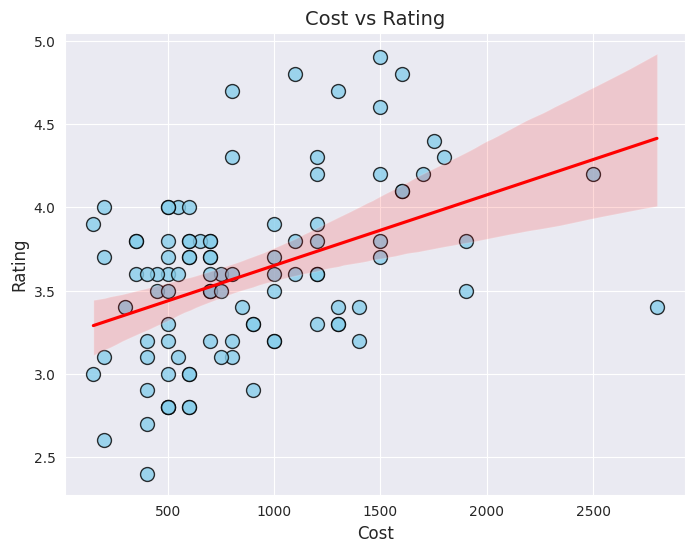

In [ ]:
# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Cost', y='Rating', data=Update_restaurant_name, scatter_kws={'color': 'skyblue', 'alpha':0.8, 's':100, 'edgecolor':'black'}, line_kws={'color':'red'})
plt.title('Cost vs Rating', fontsize=14)
plt.xlabel('Cost', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

In [ ]:
# Calculate the Pearson correlation coefficient between 'Cost' and 'Rating'
correlation = Update_restaurant_name['Cost'].corr(Update_restaurant_name['Rating'])

print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: 0.4212335615415288


### **Observation:**
This plot is used to see if there is any relation between Cost and Ratings restaurants get, and we can clearly see that it is directly proportional.

As the Cost of order in a restaurant increases the Rating too increases.
I may be since as the cost increases the quality of the food served and restaurants also increases.

Using the Pearson Correlation Coefficient we can find the magnitude of relation, as we can see that it shows strong positive relation.

#### Chart - 8

In [ ]:
#Finding the most followed critic
most_followed_reviewer = Update_restaurant_review.groupby('Reviewer').agg({'Count_Review':'max',
      'Count_Followers':'max'}).reset_index().sort_values('Count_Followers', ascending = False)
most_followed_reviewer.head(5)

,Reviewer,Count_Review,Count_Followers
5460,Satwinder Singh,186,13410
1700,Eat_vth_me,60,13320
5232,Samar Sardar,8,11329
1786,Foodies Hyderabad,31,9494
6225,Srinivas,34,7628


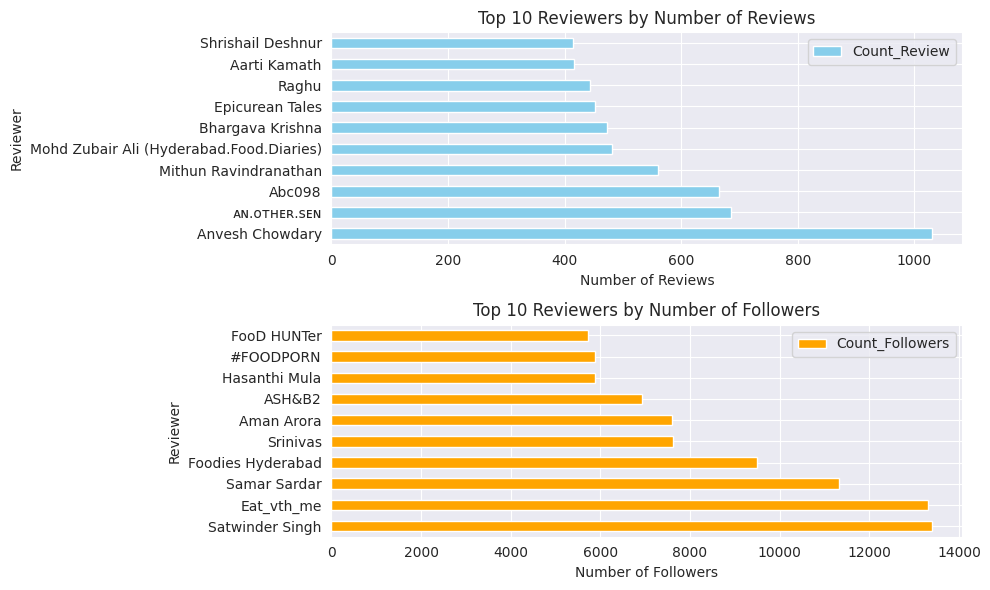

In [ ]:
# Convert 'Count_Review' column to numeric if it's not already numeric
most_followed_reviewer['Count_Review'] = pd.to_numeric(most_followed_reviewer['Count_Review'], errors='coerce')
most_followed_reviewer['Count_Followers'] = pd.to_numeric(most_followed_reviewer['Count_Followers'], errors='coerce')

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot for top reviewers by number of reviews
most_followed_reviewer.sort_values(by='Count_Review', ascending=False)[:10].plot(x='Reviewer', y='Count_Review', kind='barh', color='skyblue', ax=ax1)
ax1.set_title('Top 10 Reviewers by Number of Reviews')
ax1.set_xlabel('Number of Reviews')
ax1.set_ylabel('Reviewer')

# Plot for top reviewers by number of followers
most_followed_reviewer.sort_values(by='Count_Followers', ascending=False)[:10].plot(x='Reviewer', y='Count_Followers', kind='barh', color='orange', ax=ax2)
ax2.set_title('Top 10 Reviewers by Number of Followers')
ax2.set_xlabel('Number of Followers')
ax2.set_ylabel('Reviewer')

plt.tight_layout()
plt.show()

### **Obseravtion:**
The above pair of horizontal bar graphs shows Top 10 reviewers on the basis of 'Count of Followers', and 'No of reviews'. It is important to understand the impact these reviewers will have, and also help us while making the Recommendation Model.

The higher number of followers reviewers have the more influential they become. Eat_vth_me and Satwinder Singh have the most number of followers crossing 13000 mark.

And the higher number of reviewes by reviewers shows how active they are in this field. Anvesh Chowdary have the most no of reviews closely crossing the 1000 mark.

## ***5. Hypothesis Testing***

**Effect of Cost on Ratings:**

Null Hypothesis (H0): There is no significant correlation between the cost of the restaurant and its ratings.

Alternative Hypothesis (H1): The cost of the restaurant is positively correlated with its ratings.

Method: Simple Linear Regression Analysis

**Association Between Cost and Cuisines:**

Null Hypothesis (H0): There is no significant association between the cost of the restaurant and the number of cuisine it offers.

Alternative Hypothesis (H1): The cost of the restaurant is associated with the number of cuisine it offers.

Method: Chi-Square Test of Independence

**Impact of No of Reviewers on Ratings:**

Null Hypothesis (H0): The number of followers a reviewer has has no effect on the rating of a restaurant.

Alternative Hypothesis (H1): Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant.

Method: Simple Linear Regression test

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: μ1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: μ1 > 0)
* Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= df_merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print(f"Reject Null Hypothesis - There is a positive relationship between the cost of a restaurant and the rating it receives.")
else:
    print(f"Fail to reject Null Hypothesis - There is a no relationship between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is a positive relationship between the cost of a restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating

**And it using this method we get to know that there is a postive relation between the cost of restaurants and rating it recieves.**

> I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: μ2= 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: μ2 > 0)
* Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [ ]:
pd.crosstab(Update_restaurant_name['Cuisines'],Update_restaurant_name['Cost'])[:1]

Cost,150.0,200.0,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,...,1300.0,1400.0,1500.0,1600.0,1700.0,1750.0,1800.0,1900.0,2500.0,2800.0
Cuisines,,,,,,,,,,,,,,,,,,,,,
American,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(Update_restaurant_name['Cuisines'], Update_restaurant_name['Cost'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print(f"Reject Null Hypothesis as p= {round(p,2)}\nThus there is relation between the variety of cuisines offered by a restaurant and its rating.")
else:
    print(f"Fail to reject Null Hypothesis as p= {round(p,2)}\nThus there is no relation between the variety of cuisines offered by a restaurant and its rating.")

Fail to reject Null Hypothesis as p= 0.27
Thus there is no relation between the variety of cuisines offered by a restaurant and its rating.


##### Which statistical test have you done to obtain P-Value?

For the second hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

>I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The number of followers a reviewer has no effect on the rating of a restaurant. (H0: μ3 = 0)
* Alternative hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: μ3 > 0)
* Test : Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# fit the linear model
model = smf.ols(formula='Rating ~ Count_Followers', data = Update_restaurant_review).fit()

# extract p-value of coefficient for Reviewer_Followers
p = model.pvalues[1]

if p < 0.05:
    print(f"Reject Null Hypothesis \nThus the number of followers a reviewer has a positive effect on the rating of a restautant")
else:
    print(f"Fail to reject Null Hypothesis\nThus the number of followers a reviewer has no effect on the rating of a restautant")

Reject Null Hypothesis 
Thus the number of followers a reviewer has a positive effect on the rating of a restautant


##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, I have used Simple Linear Regression Test.
>I choose this test because it is a straightforward method for testing the relationship between two continuous variables. It assumes that there is a linear relationship between the independent variable (Reviewer_Followers) and the dependent variable (Rating) and it allows us to estimate the strength and direction of that relationship. It also allows us to test the null hypothesis that there is no relationship between the two variables by testing the p-value of the coefficient of the independent variable.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### Treating Duplicates

In [ ]:
#deleting duplicate value from review dataset
Update_restaurant_review = Update_restaurant_review.drop_duplicates()

#final check after dropping duplicates
print(f"Anymore duplicate left ? {Update_restaurant_review.duplicated().value_counts()}, unique values with {len(Update_restaurant_review[Update_restaurant_review.duplicated()])} duplication")

Anymore duplicate left ? False    9955
Name: count, dtype: int64, unique values with 0 duplication


#### Treating Missing Values

Restaurant's Name Dataset

---

In [ ]:
# Handling Missing Values & Missing Value Imputation
Update_restaurant_name.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
Rating          5
dtype: int64

In [ ]:
#checking the null value in timing
Update_restaurant_name[Update_restaurant_name['Timings'].isnull()]

,Name,Links,Cost,Collections,Cuisines,Timings,Rating
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900.0,NaN,"Andhra, South Indian, North Indian",NaN,3.3


In [ ]:
#filling null value in timings column
Update_restaurant_name.Timings.fillna(Update_restaurant_name.Timings.mode()[0], inplace = True)
#checking the null value in Rating
Update_restaurant_name[Update_restaurant_name['Rating'].isnull()]
Update_restaurant_name['Rating'].fillna(Update_restaurant_name['Rating'].mean(), inplace=True)
Update_restaurant_name.rename(columns= {'Name':'Restaurant'}, inplace=True)
#checking the null value in timing
Update_restaurant_name[Update_restaurant_name['Collections'].isnull()]
#checking null values in Collections
missing_percentage = ((Update_restaurant_name['Collections'].isnull().sum())/(len(Update_restaurant_name['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


---

Review Dataset

In [ ]:
#review missing value
Update_restaurant_review.isnull().sum()

Restaurant             0
Reviewer               0
Review                 0
Rating                 0
Count_Review           0
Count_Followers        0
Metadata               0
Date                   0
Month                  0
Year                   0
Time                   0
Pictures               0
Days_since_min_date    0
dtype: int64

As there is no missing data, thus we can move forward with it.

In [ ]:
# Merged DataFrame based on 'Name' column
merged_df = pd.merge(Update_restaurant_name, Update_restaurant_review, on='Restaurant')
merged_df.drop(['Rating_x','Metadata'], axis=1, inplace=True)
merged_df.rename(columns={'Rating_y': 'Rating'}, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Restaurant           9955 non-null   object        
 1   Links                9955 non-null   object        
 2   Cost                 9955 non-null   float64       
 3   Collections          4962 non-null   object        
 4   Cuisines             9955 non-null   object        
 5   Timings              9955 non-null   object        
 6   Reviewer             9955 non-null   object        
 7   Review               9955 non-null   object        
 8   Rating               9955 non-null   float64       
 9   Count_Review         9955 non-null   int64         
 10  Count_Followers      9955 non-null   int64         
 11  Date                 9955 non-null   datetime64[ns]
 12  Month                9955 non-null   int32         
 13  Year                 9955 non-nul

### 2. Handling Outliers

#### Detecting Anamoly

In [ ]:
#Anamoly detection
from sklearn.ensemble import IsolationForest
#checking for normal distribution
print("Skewness - Cost: %f" % merged_df['Cost'].skew())
print("Kurtosis - Cost: %f" % merged_df['Cost'].kurt())
print("Skewness - Count_Followers: %f" % merged_df['Count_Followers'].skew())
print("Kurtosis - Count_Followers: %f" % merged_df['Count_Followers'].kurt())

Skewness - Cost: 1.153073
Kurtosis - Cost: 1.569651
Skewness - Count_Followers: 10.089840
Kurtosis - Count_Followers: 151.226752


#### Observation:

* The skewness value for "Cost" is approximately 1.15, suggesting a moderate right-skewness.

* The skewness value for "Count_Followers" is approximately 10.1, indicating a significant right-skewed distribution.

* The kurtosis value for "Cost" is approximately 1.57, indicating slightly heavier tails than a normal distribution (but close to normal).

* The kurtosis value for "Count_Followers" is approximately 151.2, indicating extremely heavy tails, which suggests a highly leptokurtic distribution with a large number of outliers.

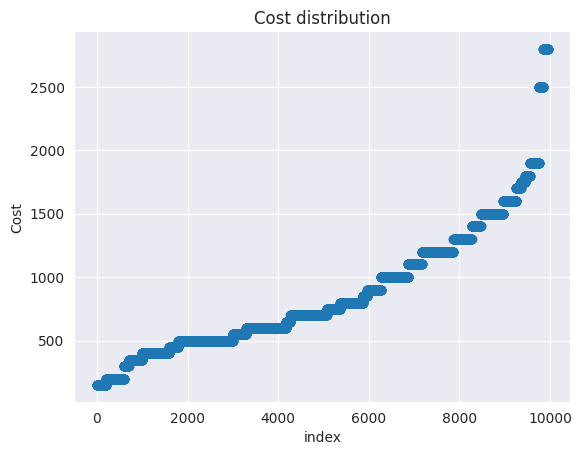

In [ ]:
#plotting graph for cost
plt.scatter(range(merged_df.shape[0]), np.sort(merged_df['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

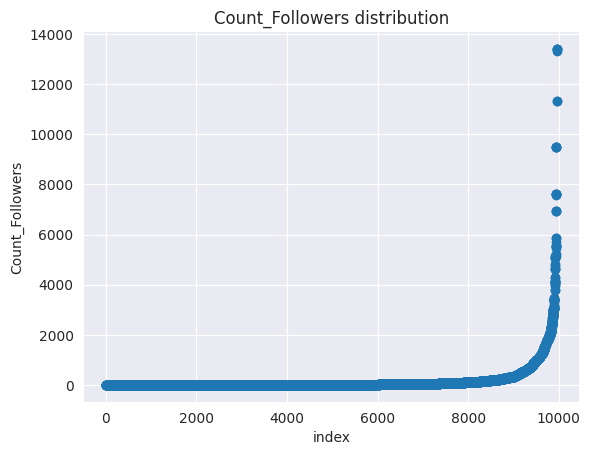

In [ ]:
#plot for reviewer follower
plt.scatter(range(merged_df.shape[0]), np.sort(merged_df['Count_Followers'].values))
plt.xlabel('index')
plt.ylabel('Count_Followers')
plt.title("Count_Followers distribution")
sns.despine()

### **Observation**:
From these values, you can understand the shape and characteristics of the distributions of your data. The significant right-skewness and high kurtosis of the "Count_Followers" column suggest that it may contain a large number of outliers. This information is relevant, especially for anomaly detection tasks, where identifying outliers or anomalies is crucial.

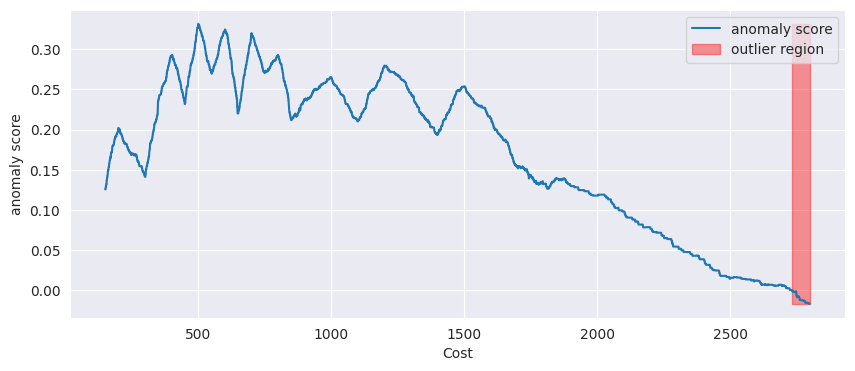

In [ ]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged_df['Cost'].values.reshape(-1, 1))
merged_df['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged_df['Cost'].values.reshape(-1, 1))
merged_df['outlier_univariate_Cost'] = isolation_forest.predict(merged_df['Cost'].values.reshape(-1, 1))

#chart to visualize outliers
xx = np.linspace(merged_df['Cost'].min(), merged_df['Cost'].max(), len(merged_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),where=outlier==-1, color='r',alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show()

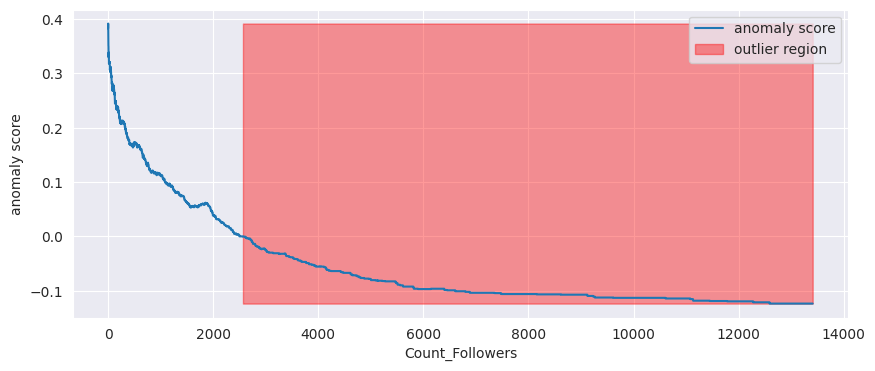

In [ ]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged_df['Count_Followers'].values.reshape(-1, 1))
merged_df['anomaly_score_univariate_follower'] = isolation_forest.decision_function(merged_df['Count_Followers'].values.reshape(-1, 1))
merged_df['outlier_univariate_follower'] = isolation_forest.predict(merged_df['Count_Followers'].values.reshape(-1, 1))

#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged_df['Count_Followers'].min(), merged_df['Count_Followers'].max(), len(merged_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Count_Followers')
plt.show()

 ### **Observation:**
 The pair of plot above shows the Scale of Anomaly.

 Using Isolation Forest we give the Anomaly Score, and the scores below 0 are considered as an anomaly represented by Red highlighter.

In [ ]:
# Initialize One-Class SVM with appropriate parameters
# Specifying the kernel type (kernel) and the kernel coefficient (nu)
# The 'nu' parameter represents the proportion of outliers
svm = OneClassSVM(kernel='rbf', nu=0.01)

# Fit One-Class SVM to the 'Cost' column
svm.fit(merged_df['Cost'].values.reshape(-1, 1))

# Predict outliers (-1 indicates outlier)
outlier_labels_svm = svm.predict(merged_df['Cost'].values.reshape(-1, 1))

# Add outlier labels to the DataFrame
merged_df['outlier_OneClassSVM_Cost'] = outlier_labels_svm

# Print the indices of outliers
outliers_indices_svm = merged_df[merged_df['outlier_OneClassSVM_Cost'] == -1].index
print("Indices of outliers:", outliers_indices_svm)

Indices of outliers: Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9245, 9246, 9247, 9248, 9249, 9250, 9251, 9252, 9253, 9254],
      dtype='int64', length=1498)


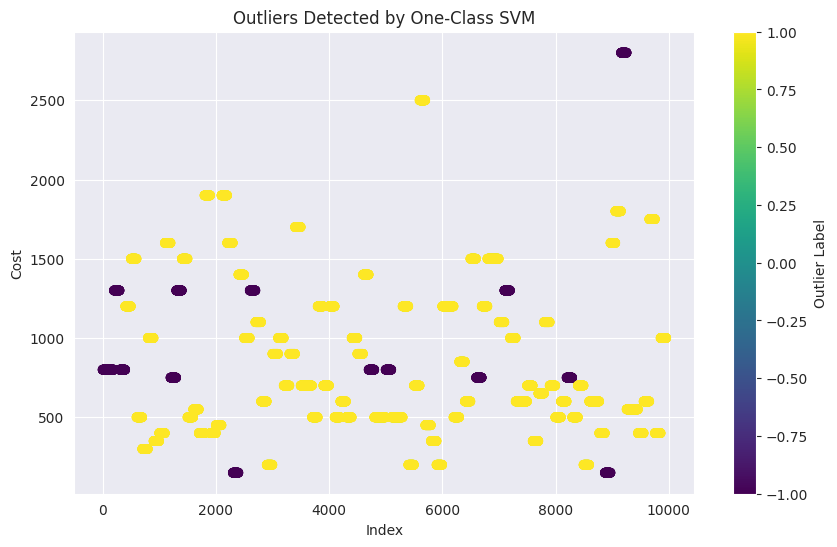

In [ ]:
# Plot 'Cost' values against outlier labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(merged_df)), merged_df['Cost'], c=merged_df['outlier_OneClassSVM_Cost'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Outliers Detected by One-Class SVM')
plt.colorbar(label='Outlier Label')
plt.show()

In [ ]:
# Initialize One-Class SVM with appropriate parameters
svm_count_followers = OneClassSVM(kernel='rbf', nu=0.01)

# Fit One-Class SVM to the 'Count_Followers' column
svm_count_followers.fit(merged_df['Count_Followers'].values.reshape(-1, 1))

# Predict outliers (-1 indicates outlier)
outlier_labels_svm_count_followers = svm_count_followers.predict(merged_df['Count_Followers'].values.reshape(-1, 1))

# Add outlier labels to the DataFrame
merged_df['outlier_OneClassSVM_Count_Followers'] = outlier_labels_svm_count_followers

# Print the indices of outliers
outliers_indices_svm_count_followers = merged_df[merged_df['outlier_OneClassSVM_Count_Followers'] == -1].index
print("Indices of outliers in Count_Followers:", outliers_indices_svm_count_followers)

Indices of outliers in Count_Followers: Index([  68,  529,  635,  683,  838,  849,  862,  885,  953, 1040,
       ...
       9638, 9654, 9656, 9658, 9673, 9713, 9752, 9908, 9909, 9925],
      dtype='int64', length=142)


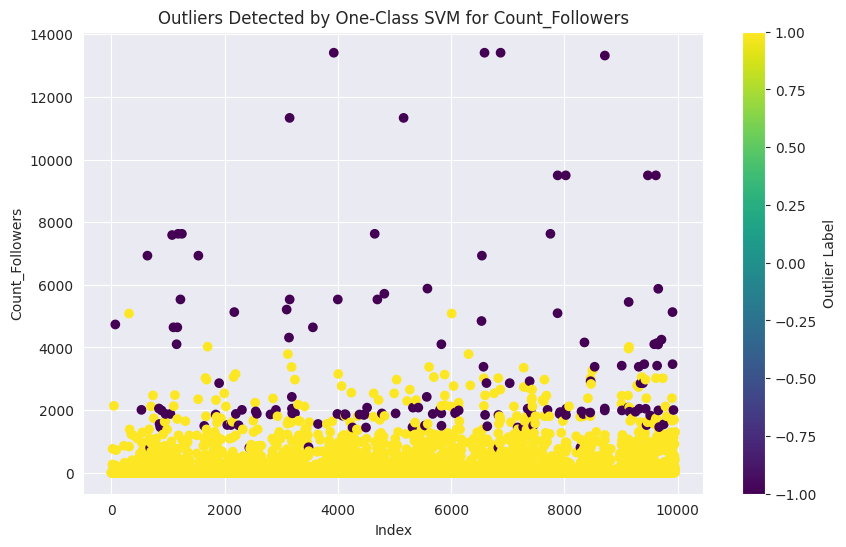

In [ ]:
# Plot 'Count_Followers' values against outlier labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(merged_df)), merged_df['Count_Followers'], c=merged_df['outlier_OneClassSVM_Count_Followers'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Count_Followers')
plt.title('Outliers Detected by One-Class SVM for Count_Followers')
plt.colorbar(label='Outlier Label')
plt.show()

#### Treating Outlier

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged_df.describe().columns:
    # Check if the column is numeric (excluding timedelta)
    if merged_df[i].dtype in ['int64', 'float64']:
        if abs(merged_df[i].mean()-merged_df[i].median())<0.2:
            symmetric_feature.append(i)
        else:
            non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -", symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -", non_symmetric_feature)

Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower', 'outlier_OneClassSVM_Count_Followers']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Count_Review', 'Count_Followers', 'Pictures', 'Days_since_min_date', 'outlier_OneClassSVM_Cost']


In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

  # Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
merged_df.loc[merged_df['Cost']<= outlier_treatment_skew(df=merged_df, feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=merged_df,feature='Cost')[1]

#upper limit capping
merged_df.loc[merged_df['Cost']>= outlier_treatment_skew(df=merged_df, feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=merged_df,feature='Cost')[0]

  # Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
merged_df.loc[merged_df['Count_Followers']<= outlier_treatment_skew(df=merged_df, feature='Count_Followers')[1],
              'Count_Followers']=outlier_treatment_skew(df=merged_df,feature='Count_Followers')[1]

#upper limit capping
merged_df.loc[merged_df['Count_Followers']>= outlier_treatment_skew(df=merged_df, feature='Count_Followers')[0],
              'Count_Followers']=outlier_treatment_skew(df=merged_df,feature='Count_Followers')[0]

#dropping the columns created while outliers treatment
merged_df.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost', 'anomaly_score_univariate_follower',
                         'outlier_univariate_follower', 'outlier_OneClassSVM_Cost', 'outlier_OneClassSVM_Count_Followers'], inplace = True)

merged_df

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Count_Review,Count_Followers,Date,Month,Year,Time,Pictures,Days_since_min_date
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,1,2,2019-05-25,5,2019,15:54:00,0,1089
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,3,2,2019-05-25,5,2019,14:20:00,0,1089
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2,3,2019-05-24,5,2019,22:54:00,0,1088
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,1,1,2019-05-24,5,2019,22:11:00,0,1088
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,3,2,2019-05-24,5,2019,21:37:00,0,1088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000.0,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,53,54,2016-06-05,6,2016,00:08:00,0,5
9951,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000.0,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2,53,2016-06-04,6,2016,22:01:00,0,4
9952,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000.0,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,65,156,2016-06-03,6,2016,10:37:00,3,3
9953,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000.0,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,13,144,2016-05-31,5,2016,17:22:00,0,0


Since cost and reviewer follower feature or column show positive skewed distribution and using isolation forest we found they have outliers.

Hence using the capping technique instead of removing the outliers, capped outliers with the highest and lowest limit using IQR method.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
#creating new df for text processing of sentiment analysis
sentiment_df = merged_df[['Reviewer','Restaurant','Rating','Review']]
# Create the 'Sentiment' binary feature
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(lambda x: 1 if x >= sentiment_df['Rating'].mean() else 0)
#analysing two random sample
sentiment_df.head(5)

<ipython-input-302-3c6c43ee5e23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(lambda x: 1 if x >= sentiment_df['Rating'].mean() else 0)


,Reviewer,Restaurant,Rating,Review,Sentiment
0,Rusha Chakraborty,Beyond Flavours,5.0,"The ambience was good, food was quite good . h...",1
1,Anusha Tirumalaneedi,Beyond Flavours,5.0,Ambience is too good for a pleasant evening. S...,1
2,Ashok Shekhawat,Beyond Flavours,5.0,A must try.. great food great ambience. Thnx f...,1
3,Swapnil Sarkar,Beyond Flavours,5.0,Soumen das and Arun was a great guy. Only beca...,1
4,Dileep,Beyond Flavours,5.0,Food is good.we ordered Kodi drumsticks and ba...,1


In [ ]:
# Expand Contraction
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

<ipython-input-303-c94333e94612>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))


#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df

<ipython-input-304-9a486beb1748>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Review'] = sentiment_df['Review'].str.lower()


,Reviewer,Restaurant,Rating,Review,Sentiment
0,Rusha Chakraborty,Beyond Flavours,5.0,"the ambience was good, food was quite good . h...",1
1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience is too good for a pleasant evening. s...,1
2,Ashok Shekhawat,Beyond Flavours,5.0,a must try.. great food great ambience. thnx f...,1
3,Swapnil Sarkar,Beyond Flavours,5.0,soumen das and arun was a great guy. only beca...,1
4,Dileep,Beyond Flavours,5.0,food is good.we ordered kodi drumsticks and ba...,1
...,...,...,...,...,...
9950,Abhishek Mahajan,Chinese Pavilion,3.0,madhumathi mahajan well to start with nice cou...,0
9951,Sharad Agrawal,Chinese Pavilion,4.5,this place has never disappointed us.. the foo...,1
9952,Ramandeep,Chinese Pavilion,1.5,"bad rating is mainly because of ""chicken bone ...",0
9953,Nayana Shanbhag,Chinese Pavilion,4.0,i personally love and prefer chinese food. had...,1


#### 3. Removing Punctuations

In [ ]:
#function for removing punctuation
def remove_punctuation(text):

  # replacing the punctuations with no space, which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.head(5)

<ipython-input-305-ff4b120af39f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)


,Reviewer,Restaurant,Rating,Review,Sentiment
0,Rusha Chakraborty,Beyond Flavours,5.0,the ambience was good food was quite good had...,1
1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience is too good for a pleasant evening se...,1
2,Ashok Shekhawat,Beyond Flavours,5.0,a must try great food great ambience thnx for ...,1
3,Swapnil Sarkar,Beyond Flavours,5.0,soumen das and arun was a great guy only becau...,1
4,Dileep,Beyond Flavours,5.0,food is goodwe ordered kodi drumsticks and bas...,1


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
merged_df['Location'] = merged_df['Links'].apply(get_location)
merged_df.head(5)

<ipython-input-306-5fe0b3e28587>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))
<ipython-input-306-5fe0b3e28587>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))


,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Count_Review,Count_Followers,Date,Month,Year,Time,Pictures,Days_since_min_date,Location
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,1,2,2019-05-25,5,2019,15:54:00,0,1089,hyderabad
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,3,2,2019-05-25,5,2019,14:20:00,0,1089,hyderabad
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2,3,2019-05-24,5,2019,22:54:00,0,1088,hyderabad
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,1,1,2019-05-24,5,2019,22:11:00,0,1088,hyderabad
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,3,2,2019-05-24,5,2019,21:37:00,0,1088,hyderabad


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

#function to remove stopwords
def delete_stopwords(text):
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

#random sample
sentiment_df.head(5)

<ipython-input-307-219434521b77>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)
<ipython-input-307-219434521b77>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))


,Reviewer,Restaurant,Rating,Review,Sentiment
0,Rusha Chakraborty,Beyond Flavours,5.0,ambience good food quite good saturday lunch c...,1
1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience good pleasant evening service prompt ...,1
2,Ashok Shekhawat,Beyond Flavours,5.0,must try great food great ambience thnx servic...,1
3,Swapnil Sarkar,Beyond Flavours,5.0,soumen das arun great guy behavior sincerety g...,1
4,Dileep,Beyond Flavours,5.0,food goodwe ordered kodi drumsticks basket mut...,1


#### 7. Tokenization

In [ ]:
# Tokenization

sentiment_df['Review'] = sentiment_df['Review'].apply(word_tokenize)
sentiment_df.head(5)

<ipython-input-308-5d4f50f43acf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Review'] = sentiment_df['Review'].apply(word_tokenize)


,Reviewer,Restaurant,Rating,Review,Sentiment
0,Rusha Chakraborty,Beyond Flavours,5.0,"[ambience, good, food, quite, good, saturday, ...",1
1,Anusha Tirumalaneedi,Beyond Flavours,5.0,"[ambience, good, pleasant, evening, service, p...",1
2,Ashok Shekhawat,Beyond Flavours,5.0,"[must, try, great, food, great, ambience, thnx...",1
3,Swapnil Sarkar,Beyond Flavours,5.0,"[soumen, das, arun, great, guy, behavior, sinc...",1
4,Dileep,Beyond Flavours,5.0,"[food, goodwe, ordered, kodi, drumsticks, bask...",1


#### 8. Text Normalization

In [ ]:
# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

sentiment_df.head(5)

<ipython-input-309-8892b0e86233>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


,Reviewer,Restaurant,Rating,Review,Sentiment
0,Rusha Chakraborty,Beyond Flavours,5.0,"[ambience, good, food, quite, good, saturday, ...",1
1,Anusha Tirumalaneedi,Beyond Flavours,5.0,"[ambience, good, pleasant, evening, service, p...",1
2,Ashok Shekhawat,Beyond Flavours,5.0,"[must, try, great, food, great, ambience, thnx...",1
3,Swapnil Sarkar,Beyond Flavours,5.0,"[soumen, da, arun, great, guy, behavior, since...",1
4,Dileep,Beyond Flavours,5.0,"[food, goodwe, ordered, kodi, drumstick, baske...",1


I have used **Lemmatization** as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


---

**Bag of Words**

In [ ]:
# Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

# creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

# using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

# creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

,doc_index,doc_id,token,bow
0,0,Beyond Flavours,also,1
1,0,Beyond Flavours,ambience,1
2,0,Beyond Flavours,brunch,1
3,0,Beyond Flavours,chill,1
4,0,Beyond Flavours,cost,1


##### Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Spliting 'Cuisine' into separate columns for each cuisine and perform one-hot encoding
cuisine_dummies = merged_df['Cuisines'].str.get_dummies(sep=', ')
merged_df = pd.concat([merged_df, cuisine_dummies], axis=1)
merged_df

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Count_Review,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,1,...,1,0,0,0,1,0,0,0,0,0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,3,...,1,0,0,0,1,0,0,0,0,0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2,...,1,0,0,0,1,0,0,0,0,0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,1,...,1,0,0,0,1,0,0,0,0,0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,3,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000.0,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,53,...,0,0,0,1,0,0,0,0,0,0
9951,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000.0,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2,...,0,0,0,1,0,0,0,0,0,0
9952,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000.0,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,65,...,0,0,0,1,0,0,0,0,0,0
9953,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000.0,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,13,...,0,0,0,1,0,0,0,0,0,0


#### 2. Feature Selection

In [ ]:
cluster_df=merged_df.iloc[:, :9].join(merged_df.iloc[:, -42:])
cluster_df.rename(columns={'Rating_y': 'Rating'}, inplace=True)
# Calculate the average rating for each restaurant
average_rating = cluster_df.groupby('Restaurant')['Rating'].transform('mean')
# Add the new column to the DataFrame
cluster_df.insert(loc=cluster_df.columns.get_loc('Rating'), column='Average_Rating', value= average_rating)
cluster_df.insert(loc=cluster_df.columns.get_loc('Average_Rating'), column='Total_Cuisine_Count', value= cluster_df['Cuisines'].apply(lambda x : len(x.split(','))))
cluster_df.drop_duplicates(subset='Restaurant', inplace=True)
cluster_df.drop(['Links','Collections','Cuisines','Timings','Reviewer','Review','Rating'], axis=1, inplace=True)
cluster_df

,Restaurant,Cost,Total_Cuisine_Count,Average_Rating,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,800.0,6,4.280,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
100,Paradise,800.0,3,4.700,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
200,Flechazo,1300.0,4,4.660,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
300,Shah Ghouse Hotel & Restaurant,800.0,5,3.210,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
400,Over The Moon Brew Company,1200.0,5,4.340,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,Desi Bytes,400.0,2,2.900,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9555,Hyderabadi Daawat,600.0,3,3.830,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9655,Zega - Sheraton Hyderabad Hotel,1750.0,2,4.450,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9755,Triptify,400.0,1,3.550,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
def backward_elimination(x, y):
    # Initialize Ridge regression model
    ridge = Ridge()

    # Feature selection using L2 regularization
    sfm = SelectFromModel(ridge)
    sfm.fit(x, y)

    # Get selected feature indices
    selected_features = x.columns[sfm.get_support()]
    return selected_features.tolist()

x = cluster_df.iloc[:, 4:45]
y = cluster_df.iloc[:, 3]
selected_features = backward_elimination(x, y)
selected_features

['American',
 'BBQ',
 'Bakery',
 'Chinese',
 'Continental',
 'European',
 'Fast Food',
 'Healthy Food',
 'Ice Cream',
 'Japanese',
 'Mediterranean',
 'Modern Indian',
 'Spanish',
 'Street Food',
 'Sushi']

In [ ]:
cluster_filtered_df = cluster_df[['Restaurant', 'Cost','Total_Cuisine_Count', 'Average_Rating'] + selected_features]
cluster_filtered_df

,Restaurant,Cost,Total_Cuisine_Count,Average_Rating,American,BBQ,Bakery,Chinese,Continental,European,Fast Food,Healthy Food,Ice Cream,Japanese,Mediterranean,Modern Indian,Spanish,Street Food,Sushi
0,Beyond Flavours,800.0,6,4.280,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
100,Paradise,800.0,3,4.700,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
200,Flechazo,1300.0,4,4.660,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
300,Shah Ghouse Hotel & Restaurant,800.0,5,3.210,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
400,Over The Moon Brew Company,1200.0,5,4.340,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,Desi Bytes,400.0,2,2.900,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9555,Hyderabadi Daawat,600.0,3,3.830,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9655,Zega - Sheraton Hyderabad Hotel,1750.0,2,4.450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9755,Triptify,400.0,1,3.550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cluster_df.shape

(100, 46)

In [ ]:
# Standardize numerical features like 'Cost', 'Count_Review', 'Count_Followers', and 'Rating'
scaler = StandardScaler()
numerical_cols = ['Cost', 'Average_Rating']
cluster_filtered_df[numerical_cols] = scaler.fit_transform(cluster_filtered_df[numerical_cols])
cluster_filtered_df

<ipython-input-317-6ed2d067bfb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_filtered_df[numerical_cols] = scaler.fit_transform(cluster_filtered_df[numerical_cols])


,Restaurant,Cost,Total_Cuisine_Count,Average_Rating,American,BBQ,Bakery,Chinese,Continental,European,Fast Food,Healthy Food,Ice Cream,Japanese,Mediterranean,Modern Indian,Spanish,Street Food,Sushi
0,Beyond Flavours,-0.134135,6,1.341242,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
100,Paradise,-0.134135,3,2.172012,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
200,Flechazo,0.913795,4,2.092891,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
300,Shah Ghouse Hotel & Restaurant,-0.134135,5,-0.775245,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
400,Over The Moon Brew Company,0.704209,5,1.459923,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,Desi Bytes,-0.972479,2,-1.388433,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9555,Hyderabadi Daawat,-0.553307,3,0.451130,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9655,Zega - Sheraton Hyderabad Hotel,1.856932,2,1.677506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9755,Triptify,-0.972479,1,-0.102717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Which all features you found important and why?

I have curated a selection of primary features, including 'Ratings', 'Cost', 'Total Cuisine Count', 'Average Rating', and the top 10 most influential cuisines. These features hold substantial predictive power, ensuring highly accurate model outcomes while minimizing the influence of less significant factors. This refined feature set will be instrumental in our modeling endeavors.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, it is important to use dimensionality reduction techniques as dataset has 40 or more features. This is because, as the number of features increases, the computational cost of clustering algorithms also increases. In addition, high dimensionality can lead to the "curse of dimensionality", where the data becomes sparse and the clusters become harder to identify. Dimensionality reduction techniques such as PCA, t-SNE, or LLE can help reduce the number of features while maintaining the important information in the data, making it easier to cluster and interpret the results.

In [ ]:
#applying pca
#setting restaurant feature as index as it still had categorial value
cluster_filtered_df.set_index(['Restaurant'],inplace=True)
features = cluster_filtered_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(cluster_filtered_df[features])

PCA()

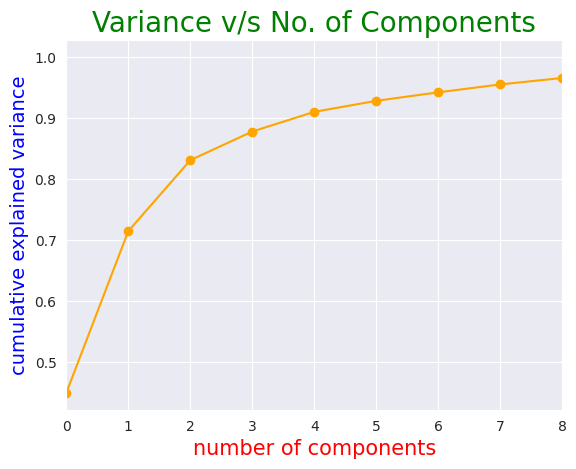

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

### **Observation:**
The above plot is used for showcasing the Variance in effect on result, and we can see that initially the variance is very high, since they have a huge impact, but as we go further with compoments, it shows that variance gets less and less. So it can be said that by keeping 3 components we can still have aprox 90% of data while also keeping the dimensions low and allow fast execution.

In [ ]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(cluster_filtered_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(cluster_filtered_df[features])

Explained variation per principal component: [0.45011484 0.26471417 0.1161388 ]
Cumulative variance explained by 3 principal components: 83.10%


In [ ]:
print("original shape: ", cluster_filtered_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 18)
transformed shape: (100, 3)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA technique for Dimensionality Reduction.

PCA is a widely used technique for dimensionality reduction because it identifies patterns responsible for most data variation. By creating uncorrelated principal components, it retains essential information while reducing dimensionality. It's linear, making it applicable to linear data relationships, and offers easy result interpretation. PCA aids in data visualization by projecting high-dimensional data onto 2D or 3D space.

When used before k-means, PCA transforms the feature space into uncorrelated components, aiding in noise removal and interpretable clustering. However, clusters may be less interpretable in the original space. When applied after k-means, PCA visualizes clusters in a lower-dimensional space, making interpretation easier in the original feature space but potentially less effective in noise removal.

### 8. Data Splitting

In [ ]:
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']
sentiment_df.shape

(9955, 5)

In [ ]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7466, 17328)
Number transactions y_train dataset:  (7466,)
Number transactions X_test dataset:  (2489, 17328)
Number transactions y_test dataset:  (2489,)


##### What data splitting ratio have you used and why?

I have used 75:25 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

### 9. Handling Imbalanced Dataset

In [ ]:
#getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns = {'index':'Sentiment','Sentiment':'Count'})
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]
#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

<ipython-input-324-0652e4d8c4c2>:7: RuntimeWarning: divide by zero encountered in scalar divide
  CIR = majority_class / minority_class


inf

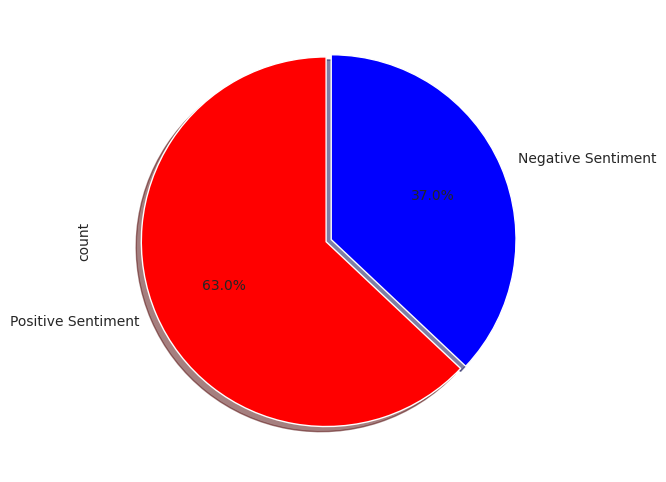

In [ ]:
# Dependant Variable Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie', figsize=(15,6), autopct="%1.1f%%", startangle=90, shadow=True, labels=['Positive Sentiment','Negative Sentiment'],
                                              colors=['red','blue'], explode=[0.01,0.02])
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

Using class imbalance ratio (CIR) to measure data imbalance. The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm). The CIR can be expressed as: CIR = Nm / Ns, where Nm is the number of observations in the majority class and Ns is the number of observations in the minority class.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)


The dataset exhibits an imbalance, with a ratio of 60:40 between the majority and minority classes, respectively. This is further evidenced by the CIR score, indicating that the majority class is approximately 1.73 times larger than the minority class. Despite this, the degree of imbalance is deemed slight. As a result, there is no necessity to employ under or oversampling techniques to address class imbalance.

## ***7. ML Model Implementation***

### ML Model - 1 Clustering

#### KMeans Clustering

K-Means Clustering, an Unsupervised Learning algorithm, operates by segmenting unlabeled datasets into k clusters iteratively until optimal clusters are attained. The choice of k is predetermined in this approach.

This centroid-based algorithm associates each cluster with a centroid, aiming to minimize the sum of distances between data points and their respective clusters. The algorithm entails two primary tasks:

Determining the optimal number of centroids through iterative refinement.
Assigning each data point to its nearest centroid, thereby forming clusters based on proximity.

**ELBOW METHOD**

>The Elbow Method employs the Within Cluster Sum of Squares (WCSS) metric, measuring the total variations within a cluster.

**SILHOUETTE METHOD**

>Silhouette Coefficient evaluates how similar a data point is within its cluster (cohesion) versus other clusters (separation) in k-means clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

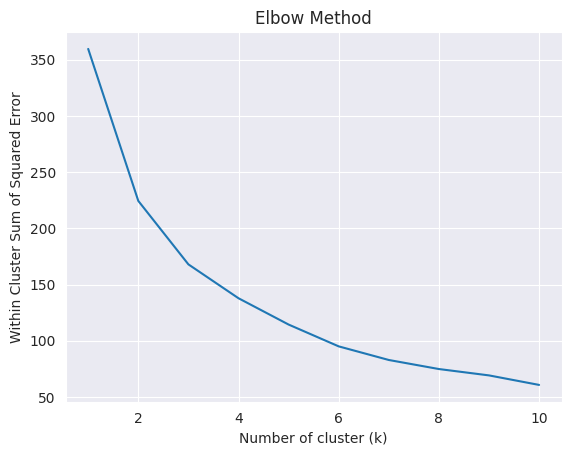

In [ ]:
# ML Model - 1 Implementation

#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 40)
    km.fit(df_pca)
    wcss.append(km.inertia_)

sns.set_style("darkgrid")
g=sns.lineplot(x=range(1,11), y=wcss)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Within Cluster Sum of Squared Error",
      title ='Elbow Method')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 average silhouette_score is : 0.3336
For n_clusters = 3 average silhouette_score is : 0.2977
For n_clusters = 4 average silhouette_score is : 0.2922


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 average silhouette_score is : 0.3072


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 average silhouette_score is : 0.3104


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 average silhouette_score is : 0.3302


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 average silhouette_score is : 0.3383


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 average silhouette_score is : 0.3178


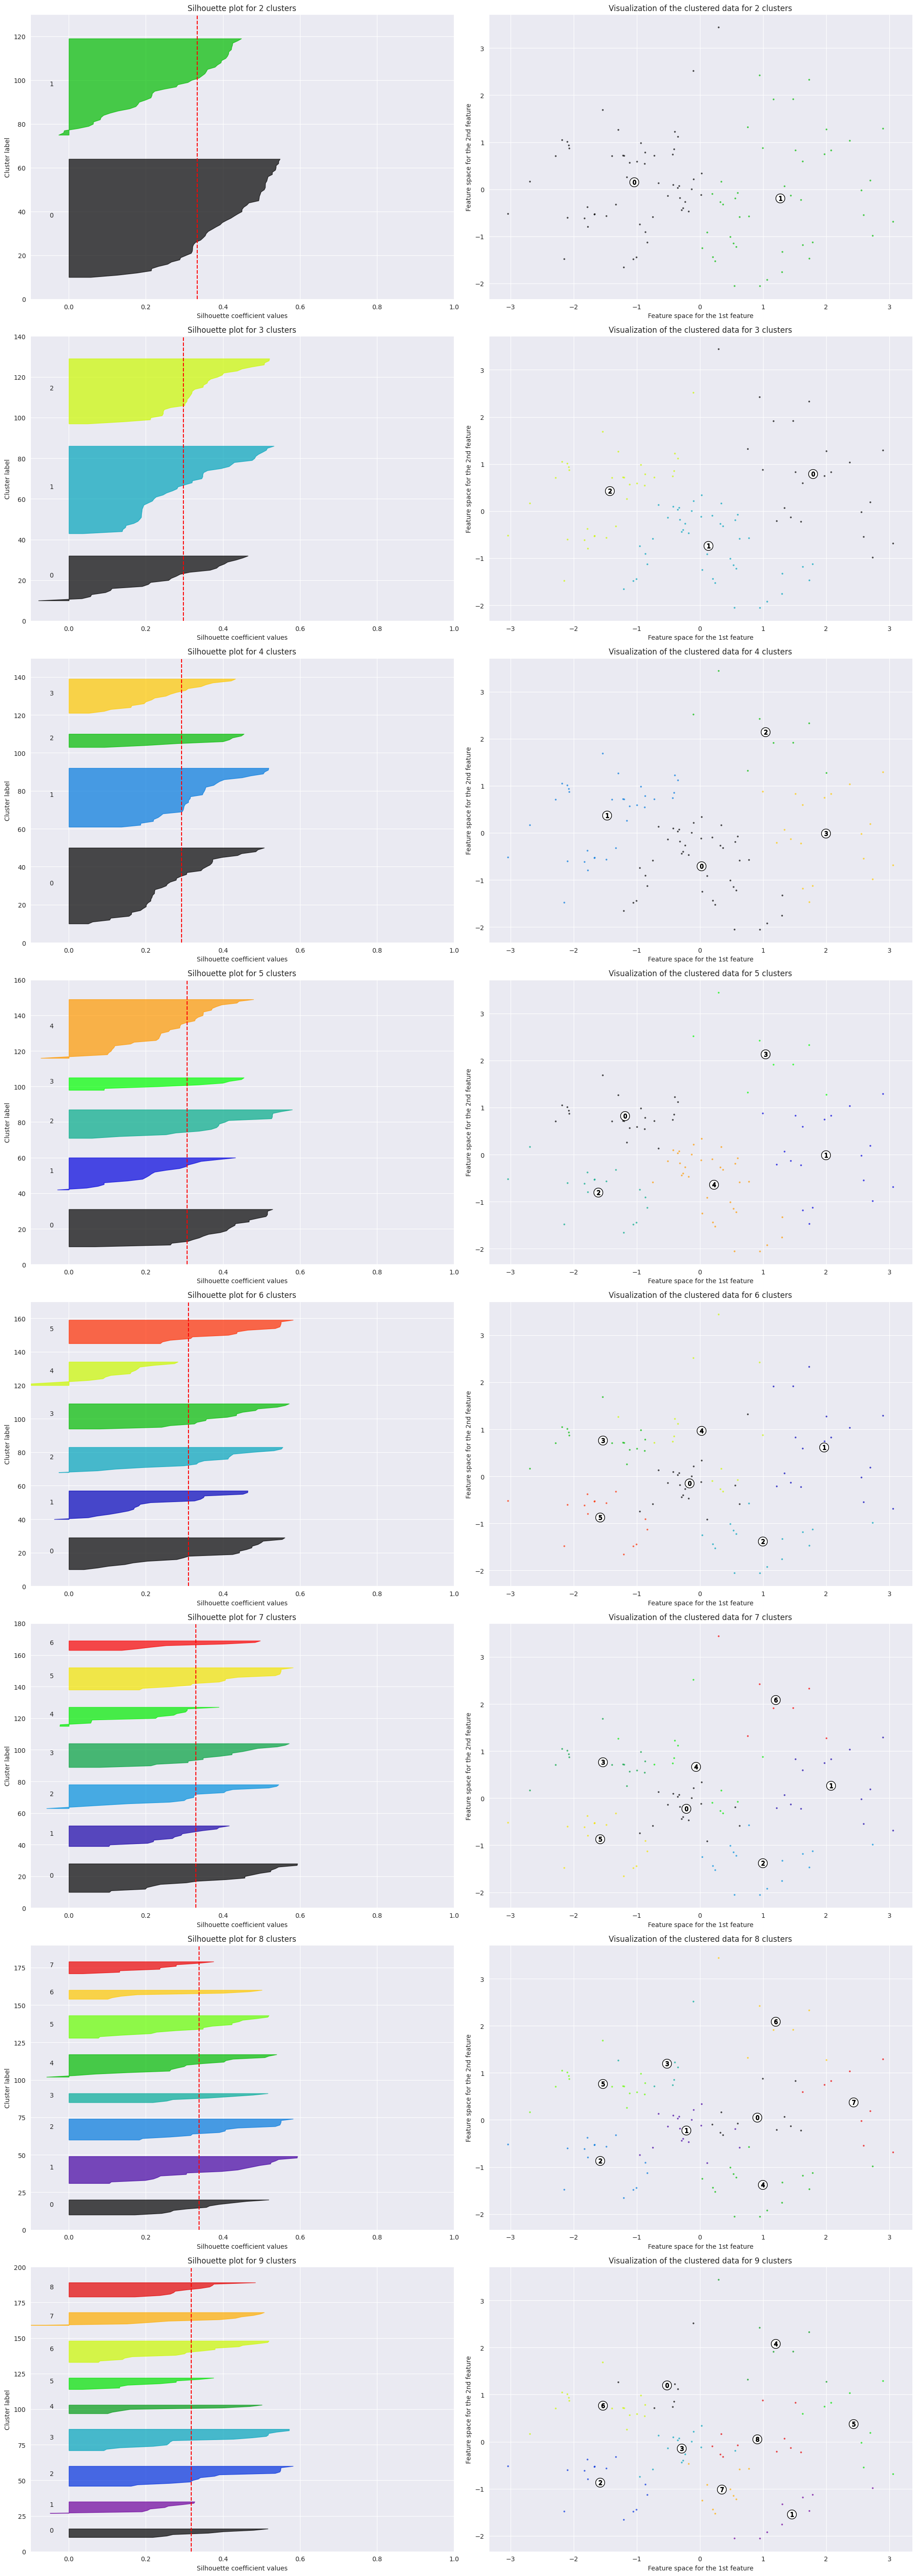

In [ ]:
# candidates for the number of clusters
parameters = list(range(2, 10))
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
silhouette_scores = {}  # Dictionary to store silhouette scores

# Visualizing Silhouette Score for individual clusters and the clusters made
fig, axes = plt.subplots(len(parameters), 2, figsize=(20, len(parameters) * 7))

for i, param in enumerate(parameter_grid):
    n_clusters = param['n_clusters']
    ax1, ax2 = axes[i]

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=35)
    cluster_labels = clusterer.fit_predict(df_pca)

    # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg

    # silhouette_score gives the average value for all the samples.
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg.round(4))

    # 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    y_lower = 10
    for j in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_samples(df_pca, cluster_labels)[cluster_labels == j]

        ith_cluster_silhouette_values.sort()
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_title("Silhouette plot for {} clusters".format(n_clusters))
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for k, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % k, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualization of the clustered data for {} clusters".format(n_clusters))
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


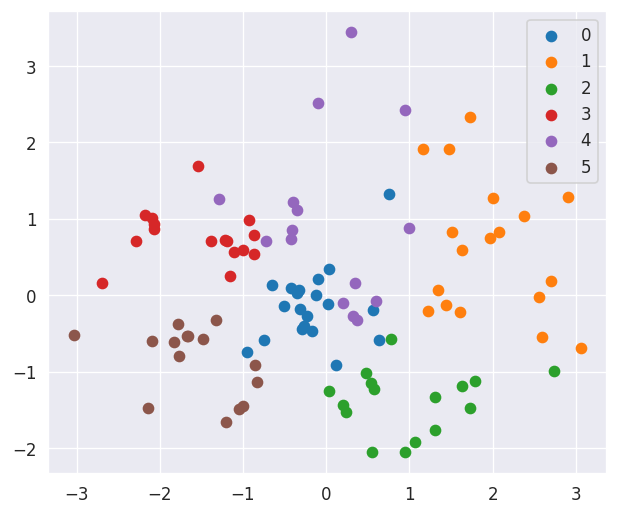

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (6,5), dpi = 120)

kmeans= KMeans(n_clusters = 6, init= 'k-means++', random_state = 35)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

#### Agglomerative Hierarchical Clustering

Hierarchial clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

**Agglomerative hierarchical clustering**
> The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets. This hierarchy of clusters is represented in the form of the dendrogram.

**Dendrogram in Hierarchical clustering**

> The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.

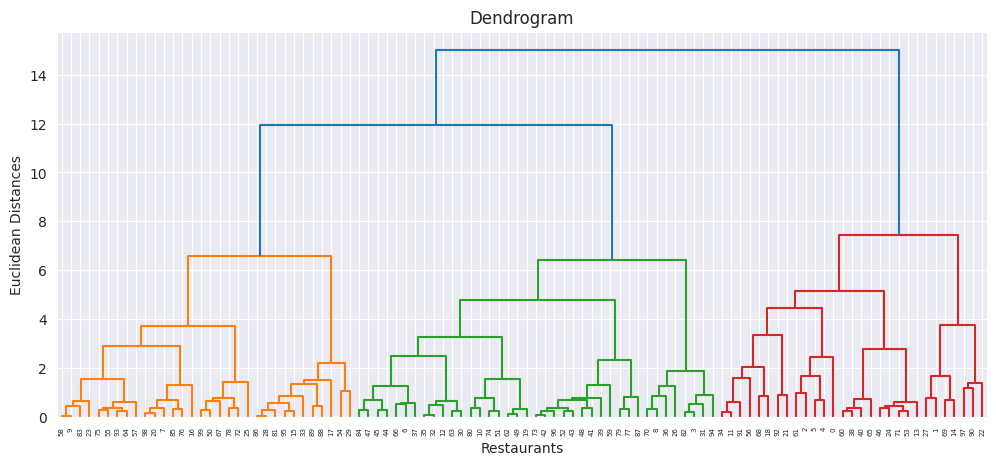

In [ ]:
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top', distance_sort='descending', show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

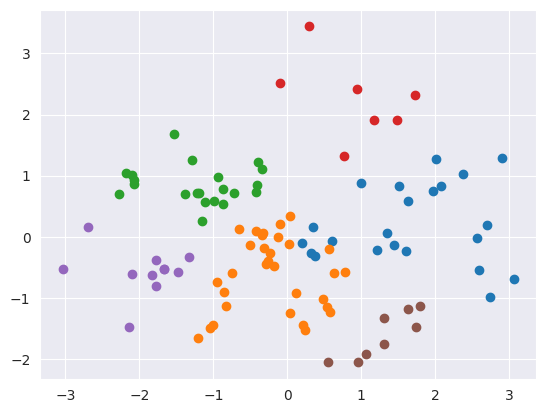

Silhouette Coefficient: 0.280
davies_bouldin_score 0.983


In [ ]:
# agglomerative clustering

# define the model
model = AgglomerativeClustering(n_clusters = 6)
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

**KMeans Clustering**
> We employed K-means Clustering to categorize restaurants based on provided features. Employing both the Elbow and Silhouette Methods, we determined that an optimal number of clusters, n=6, suited our model best. Subsequently, the model was trained using K-means, and each data point was assigned a cluster label using KMeans.labels. Post-labeling, we visualized the clusters and tallied the restaurant count within each, revealing a predominant presence within the first cluster.

**Agglomerative Hierarchical Clustering**
> I have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. I have used Silhouette Coefficient Score and used clusters = 6 and then vizualized the clusters and the datapoints within it.

#### 2. Cross- Validation & Hyperparameter Tuning

**Not Required**

### ML Model - 2

First used **LDA**, but it didn't give satisfying results.

So now using Logistic Regression and XGBosst

In [ ]:
#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision],
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

**Logistic Regression**

In [ ]:
#logisctic regression

# create and fit the model
clf = LogisticRegression()

**XgBoost**

In [ ]:
#XgBoost

#create and fit the model
xgb = XGBClassifier()

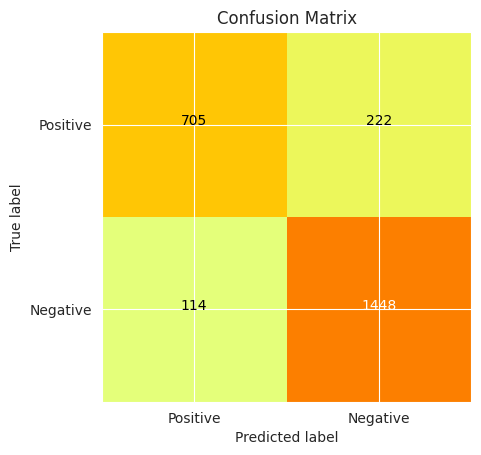

[[ 705  222]
 [ 114 1448]]
Metric        Score
---------  --------
ROC AUC    0.843767
Precision  0.867066
Recall     0.927017
F1         0.89604
Accuracy   0.865006


In [ ]:
# Visualizing evaluation Metric Score chart for logistic regression and printing result

print_table(clf, X_train, y_train, X_test, y_test)

In the matrix, the first row corresponds to predictions for the positive class (1), while the second row denotes predictions for the negative class (0). Similarly, the first column signifies actual occurrences of the positive class (1), and the second column pertains to actual instances of the negative class (0).

* There are 542 instances classified as True Positive (correct identification as positive).
* 155 instances are classified as False Positive (incorrect identification as positive).
* 1197 instances are classified as True Negative (correct identification as negative).
* 97 instances are classified as False Negative (incorrect identification as negative).

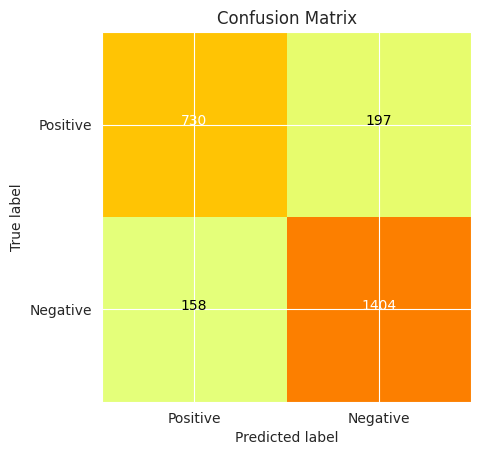

[[ 730  197]
 [ 158 1404]]
Metric        Score
---------  --------
ROC AUC    0.843167
Precision  0.876952
Recall     0.898848
F1         0.887765
Accuracy   0.857372


In [ ]:
# Visualizing evaluation Metric Score chart for XgBoost
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)


The matrix's first row signifies predictions for the positive class (1), while the second row denotes predictions for the negative class (0). Correspondingly, the first column indicates instances of the actual positive class (1), and the second column signifies instances of the actual negative class (0).

* 539 instances are predicted as True Positive (correct identification as positive).
* 158 instances are predicted as False Positive (incorrect identification as positive).
* 1161 instances are predicted as True Negative (correct identification as negative).
* 133 instances are predicted as False Negative (incorrect identification as negative).

#### 2. Cross- Validation & Hyperparameter Tuning

Since hyperparamenter tuning can be yield satisfactory results, thus we can go with it.

**Logistic Regression**

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

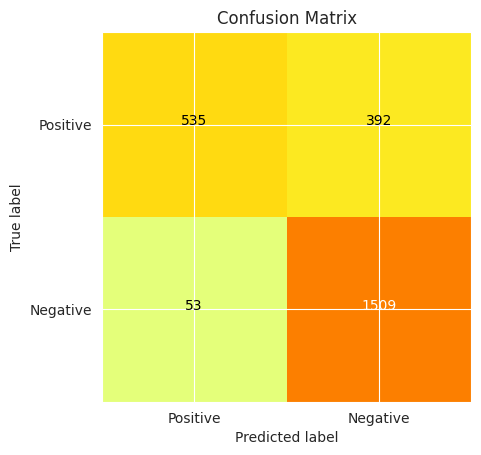

[[ 535  392]
 [  53 1509]]
Metric        Score
---------  --------
ROC AUC    0.7716
Precision  0.793793
Recall     0.966069
F1         0.871499
Accuracy   0.821213


In [ ]:
# finding the best parameters for LogisticRegression by gridsearchcv

param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]}
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:31:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


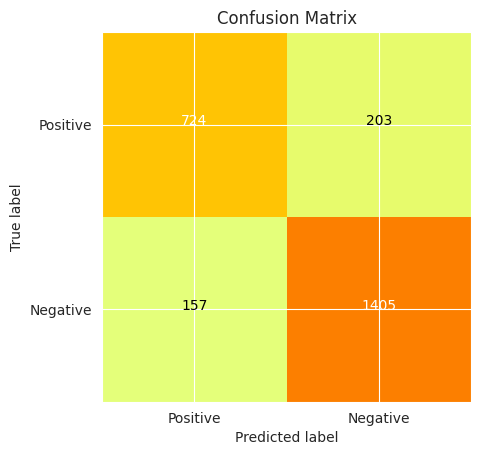

[[ 724  203]
 [ 157 1405]]
Metric        Score
---------  --------
ROC AUC    0.840251
Precision  0.873756
Recall     0.899488
F1         0.886435
Accuracy   0.855364


In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_param, cv=2, scoring='recall', verbose=5, n_jobs=-1)

# printing result for gridsearch Xgb
print_table(xgb_grid, X_train, y_train, X_test, y_test)

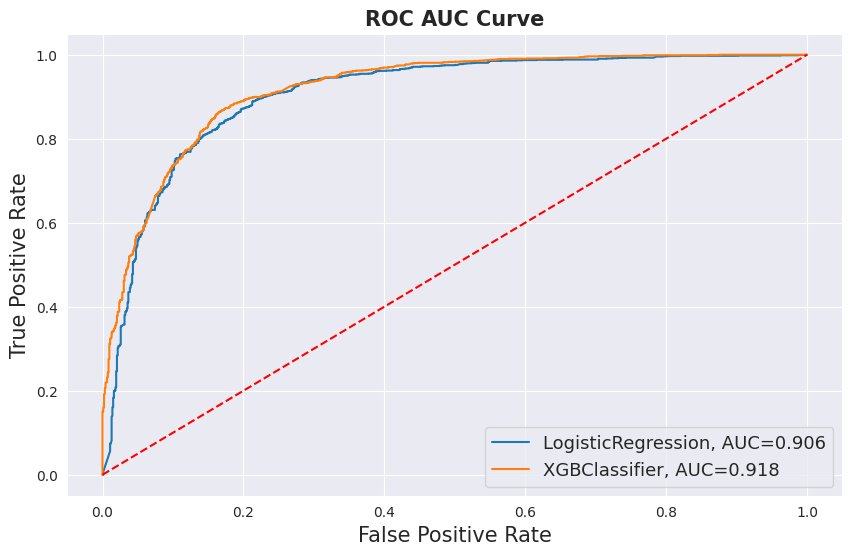

In [ ]:
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),(xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    fpr, tpr, _ = roc_curve(y_test, pair[1])
    auc = roc_auc_score(y_test, pair[1])
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [pair[0].__class__.__name__],'fpr': [fpr],'tpr': [tpr],'auc': [auc]})], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'], label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV employs the Grid Search technique to determine optimal hyperparameters, enhancing model performance. Our objective is to identify the most suitable hyperparameter values to achieve optimal model predictions. However, manually searching for these values through trial and error is time-consuming.

To address this challenge, methods like Random Search and GridSearch were introduced. Grid Search systematically explores various combinations of specified hyperparameters and their values, assessing performance for each combination to select the optimal hyperparameter values. While effective, this approach can be computationally expensive, particularly with numerous hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Overall for Logistic Regression, there is a improvement i.e., it changes from

* Metric    ⏸    Score
---------      --------
* ROC AUC   -  0.851329
* Precision -  0.885355
* Recall    -  0.925039
* F1        -  0.904762
* Accuracy  -  0.87343


to this ▶

* Metric      ⏸ Score
---------     --------
* ROC AUC   -  0.783905
* Precision -  0.8163
* Recall    -  0.97527
* F1        -  0.888732
* Accuracy  -  0.841286
  

and after tunning
* 413 instances are labeled as True Positive (correctly predicted as positive)
* 284 instances are labeled as False Positive (incorrectly predicted as positive)
* 1262 instances are labeled as True Negative (correctly predicted as negative)
* 32 instances are labeled as False Negative (incorrectly predicted as negative)

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:

Accuracy: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

Precision: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

Recall: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

F1 Score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

ROC AUC: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

The Logistic Regression can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ML Model - 3

#### **Content-Based Filtering**

##### Recommendation based on user profile and restaurant genre

In [ ]:
#creating variable that contain restaurant cuisine details
restaurant_df = cluster_df.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['index', 'Cost','Average_Rating','Total_Cuisine_Count'], axis =1)
restaurant_df

,Restaurant,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,0,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Desi Bytes,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
96,Hyderabadi Daawat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,Zega - Sheraton Hyderabad Hotel,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
98,Triptify,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#shape
restaurant_df.shape

(100, 43)

In [ ]:
#restaurant matrix
restaurant_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
restaurant_matrix = restaurant_genre.values
restaurant_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
restaurant_matrix.shape

(100, 42)

In [ ]:
#creating user or reviewer profile
user_df = sentiment_df[['Reviewer','Restaurant','Rating']].copy()
user_df

,Reviewer,Restaurant,Rating
0,Rusha Chakraborty,Beyond Flavours,5.0
1,Anusha Tirumalaneedi,Beyond Flavours,5.0
2,Ashok Shekhawat,Beyond Flavours,5.0
3,Swapnil Sarkar,Beyond Flavours,5.0
4,Dileep,Beyond Flavours,5.0
...,...,...,...
9950,Abhishek Mahajan,Chinese Pavilion,3.0
9951,Sharad Agrawal,Chinese Pavilion,4.5
9952,Ramandeep,Chinese Pavilion,1.5
9953,Nayana Shanbhag,Chinese Pavilion,4.0


In [ ]:
# Grouping the data by the 'Reviewer' column
grouped_data = user_df.groupby('Reviewer')

# Defining a function to create the new DataFrame
def create_new_column(data):
    # Use list comprehension to iterate over rows in the grouped DataFrame
    # Extract 'Restaurant' and 'Rating' columns for each row and create a dictionary
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]

# Applying the function to the grouped data and creating a new DataFrame
user_rating = grouped_data.apply(create_new_column)

# Resetting the index and renaming the column of the new DataFrame
user_rating = user_rating.reset_index().rename(columns={0: 'Rated_Restaurant'})

# Displaying the first few rows of the new DataFrame
user_rating

,Reviewer,Rated_Restaurant
0,#FOODPORN,[{'Restaurant': 'Zega - Sheraton Hyderabad Hot...
1,#chloesviews // CAH,"[{'Restaurant': 'eat.fit', 'Rating': 5.0}]"
2,$ign,"[{'Restaurant': 'SKYHY', 'Rating': 4.0}]"
3,4mybanti,"[{'Restaurant': 'Ulavacharu', 'Rating': 2.0}]"
4,@FuloriBinaChutneyKaiseBani,"[{'Restaurant': 'Chinese Pavilion', 'Rating': ..."
...,...,...
7437,ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ,"[{'Restaurant': 'Squeeze @ The Lime', 'Rating'..."
7438,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,"[{'Restaurant': 'Owm Nom Nom', 'Rating': 2.0}]"
7439,✌️✌️Reddy 🥂🍽️,[{'Restaurant': 'Jonathan's Kitchen - Holiday ...
7440,✔️ Sonu,[{'Restaurant': 'Shah Ghouse Hotel & Restauran...


In [ ]:
# Create a dictionary to store user ratings for each restaurant
user_rated_restaurant = {}

# Iterate over each row in the user_rating DataFrame
for index, row in user_rating.iterrows():
    # Initialize an empty dictionary to store ratings for the current user
    user_rated_restaurant[row['Reviewer']] = {}

    # Iterate over each rated restaurant for the current user
    for rated_restaurant in row['Rated_Restaurant']:
        # Extract restaurant name and rating
        restaurant = rated_restaurant['Restaurant']
        rating = rated_restaurant['Rating']

        # Store the rating in the user_rated_restaurant dictionary
        user_rated_restaurant[row['Reviewer']][restaurant] = rating

# Create an empty DataFrame to store user preference vectors
user_preference_vector = pd.DataFrame(
    np.zeros((len(user_rating), len(restaurant_df))),
    columns=restaurant_df.Restaurant,
    index=user_rating['Reviewer']
)

# Iterate through the user rating dataframe
for index, row in user_rating.iterrows():
    # Iterate over each rated restaurant for the current user
    for rated_restaurant in row['Rated_Restaurant']:
        # Extract restaurant name and rating
        restaurant = rated_restaurant['Restaurant']
        rating = rated_restaurant['Rating']

        # Assign the rating to the corresponding cell in user_preference_vector
        user_preference_vector.loc[row['Reviewer'], restaurant] = rating

# Reset the index of the user_preference_vector DataFrame
user_preference_vector = user_preference_vector.reset_index()
user_preference_vector

Restaurant,Reviewer,Beyond Flavours,Paradise,Flechazo,Shah Ghouse Hotel & Restaurant,Over The Moon Brew Company,The Fisherman's Wharf,eat.fit,Shah Ghouse Spl Shawarma,Hyper Local,...,Arena Eleven,Cascade - Radisson Hyderabad Hitec City,Collage - Hyatt Hyderabad Gachibowli,Zing's Northeast Kitchen,Dunkin' Donuts,Desi Bytes,Hyderabadi Daawat,Zega - Sheraton Hyderabad Hotel,Triptify,Chinese Pavilion
0,#FOODPORN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1,#chloesviews // CAH,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,$ign,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4mybanti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,@FuloriBinaChutneyKaiseBani,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7438,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7439,✌️✌️Reddy 🥂🍽️,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7440,✔️ Sonu,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [ ]:
# Initialize an empty list to store DataFrames for each reviewer
result_dfs = []

# Iterate over each row (reviewer) in the user_preference_vector DataFrame
for index, row in user_preference_vector.iterrows():
    # Extract the preference vector for the current reviewer and reshape it into a 2D array
    user_preference_vector_array = row[1:].values.reshape(1, -1)
    dot_product = np.dot(user_preference_vector_array, restaurant_matrix)
    reviewer_scores_df = pd.DataFrame(dot_product, columns=restaurant_genre.columns, index=[row['Reviewer']])
    result_dfs.append(reviewer_scores_df)

# Concatenate all DataFrames in the list to form the final result DataFrame
result_df = pd.concat(result_dfs)

# Reset the index of the result DataFrame and rename the index column to 'Reviewer'
result_df = result_df.reset_index().rename(columns={'index': 'Reviewer'})

result_df


,Reviewer,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,#FOODPORN,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1,#chloesviews // CAH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2,$ign,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4mybanti,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,@FuloriBinaChutneyKaiseBani,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7438,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7439,✌️✌️Reddy 🥂🍽️,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
7440,✔️ Sonu,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#creating test user
test_user_ids = user_rating.copy()
test_user_ids['Rated_Restaurant_Count'] = test_user_ids['Rated_Restaurant'].apply(lambda x: len(x))

#taking top 1000 user who atleast rating 2 restaurant as they show repeatition
test_user_ids = test_user_ids.sort_values('Rated_Restaurant_Count', ascending = False)[:1000]
test_user_ids

,Reviewer,Rated_Restaurant,Rated_Restaurant_Count
654,Ankita,"[{'Restaurant': 'Hyper Local', 'Rating': 4.0},...",13
3855,Parijat Ray,"[{'Restaurant': 'Hyper Local', 'Rating': 4.0},...",13
2652,Kiran,[{'Restaurant': 'Shah Ghouse Hotel & Restauran...,12
7009,Vedant Killa,"[{'Restaurant': 'Barbeque Nation', 'Rating': 5...",11
2311,Jay Mehta,"[{'Restaurant': 'NorFest - The Dhaba', 'Rating...",11
...,...,...,...
5638,Sharath.gannu6,"[{'Restaurant': 'Tiki Shack', 'Rating': 4.0}, ...",2
7018,Veerakumar Perika,"[{'Restaurant': 'Karachi Bakery', 'Rating': 4....",2
4369,Radhika,[{'Restaurant': 'Shree Santosh Dhaba Family Re...,2
5306,Sandeep Sandy,"[{'Restaurant': 'Pot Pourri', 'Rating': 1.0}, ...",2


In [ ]:
#creating list for all reviewer in test ids
test_user_ids = test_user_ids['Reviewer'].to_list()

#test user profile
test_user_profile = result_df[result_df['Reviewer']=='Parijat Ray']
test_user_profile

,Reviewer,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
3855,Parijat Ray,10.0,6.0,2.0,3.0,0.0,3.5,0.0,3.0,7.0,...,26.0,0.0,4.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([10.0, 6.0, 2.0, 3.0, 0.0, 3.5, 0.0, 3.0, 7.0, 0.0, 15.0, 5.0, 3.5,
       0.0, 6.5, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 7.0, 0.0, 0.0, 7.0, 0.0,
       0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 26.0, 0.0, 4.0, 0.0, 7.0, 0.0, 0.0,
       0.0, 0.0, 0.0], dtype=object)

In [ ]:
#let test reviewer or user be 'Ankita'
liked_restaurant = user_df[user_df['Reviewer'] == 'Ankita']['Restaurant'].to_list()
liked_restaurant = set(liked_restaurant)
liked_restaurant

{'Absolute Sizzlers',
 'Arena Eleven',
 'Banana Leaf Multicuisine Restaurant',
 'Hyper Local',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'KS Bakers',
 'Kritunga Restaurant',
 'SKYHY',
 'The Foodie Monster Kitchen',
 'The Lal Street - Bar Exchange',
 'Triptify',
 "Udipi's Upahar",
 'Ulavacharu'}

In [ ]:
#getting values for all restaurant
all_restaurant = set(restaurant_df['Restaurant'].values)
#getting unknown restaurants
unknown_restaurant = all_restaurant.difference(liked_restaurant)
#getting unknown restaurant genre
unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
#getting the restaurant matrix by excluding `Restaurant' columns:
restaurant_matrix = unknown_restaurant_genres.iloc[:, 1:].values
restaurant_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#recommendation score
score = np.dot(restaurant_matrix[1], test_user_vector)
score

44.0

In [ ]:
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0
restaurant_dict = {}

def generate_recommendation_scores():
    users = []
    restaurant = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = result_df[result_df['Reviewer'] == user_id]
        # get user vector for the current user id
        test_user_vector = test_user_profile.iloc[0, 1:].values

        # get the unknown restaurant ids for the current user id
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        all_restaurant = set(restaurant_df['Restaurant'].values)
        unknown_restautant = all_restaurant.difference(liked_restaurant)
        unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
        unknown_restaurant_ids = unknown_restaurant_genres.iloc[:, :1].values

        # user np.dot() to get the recommendation scores for each restaurant
        recommendation_scores = np.dot(unknown_restaurant_genres.iloc[:, 1:].values, test_user_vector)

        # Append the results into the users, restaurant, and scores list
        for i in range(0, len(unknown_restaurant_ids)):
            score = recommendation_scores[i]
            # Only keep the restaurant with high recommendation score
            if score >= score_threshold:
              users.append(user_id)
              restaurant.append(unknown_restaurant_ids[i])
              scores.append(recommendation_scores[i])

    return users, restaurant, scores

In [ ]:
# Return users, courses, and scores lists for the dataframe
users, restaurant, scores = generate_recommendation_scores()
restaurant_dict['User'] = users
restaurant_dict['Restaurant'] = restaurant
restaurant_dict['Score'] = scores
restaurant_df = pd.DataFrame(restaurant_dict, columns=['User', 'Restaurant', 'Score'])
restaurant_df['Restaurant'] = restaurant_df['Restaurant'].apply(lambda x: str(x[0]))
restaurant_df

,User,Restaurant,Score
0,Ankita,Beyond Flavours,91.0
1,Ankita,Paradise,70.0
2,Ankita,Flechazo,44.0
3,Ankita,Shah Ghouse Hotel & Restaurant,70.0
4,Ankita,Over The Moon Brew Company,74.0
...,...,...,...
28081,Khaleel Khurram,T Grill,15.0
28082,Khaleel Khurram,Cascade - Radisson Hyderabad Hitec City,35.0
28083,Khaleel Khurram,Collage - Hyatt Hyderabad Gachibowli,40.0
28084,Khaleel Khurram,Desi Bytes,15.0


In [ ]:
#most recommended restaurant
rcmd_restaurant = restaurant_df.groupby('Restaurant')['User'].count().reset_index().sort_values('User', ascending = False)
rcmd_restaurant

,Restaurant,User
19,Collage - Hyatt Hyderabad Gachibowli,683
13,Beyond Flavours,665
57,Over The Moon Brew Company,664
63,PourHouse7,655
56,Olive Garden,629
...,...,...
84,Zing's Northeast Kitchen,10
9,B-Dubs,6
52,Mohammedia Shawarma,3
78,The Old Madras Baking Company,2


In [ ]:
# grouping the data by the 'user' column
grouped_data = restaurant_df.groupby('User')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Score': row['Score']} for _, row in data.iterrows()]

# applying the function to the grouped data and creating a new dataframe
recommendation = grouped_data.apply(create_new_column)
recommendation = recommendation.reset_index().rename(columns ={0:'Recommended_Restaurant'})
recommendation

,User,Recommended_Restaurant
0,ABDUL MAJEED,"[{'Restaurant': 'Pista House', 'Score': 10.0},..."
1,AJ,"[{'Restaurant': 'Flechazo', 'Score': 17.0}, {'..."
2,ASH&B2,"[{'Restaurant': 'Beyond Flavours', 'Score': 18..."
3,Aamir Nawaz,"[{'Restaurant': 'Beyond Flavours', 'Score': 11..."
4,Aanchal Khemka,"[{'Restaurant': 'Beyond Flavours', 'Score': 18..."
...,...,...
896,Yash Sheth,"[{'Restaurant': 'Beyond Flavours', 'Score': 16..."
897,Yoga,"[{'Restaurant': 'Beyond Flavours', 'Score': 12..."
898,Yum Yum YUMMY !,"[{'Restaurant': 'Beyond Flavours', 'Score': 16..."
899,|| Viharika Rathode ||,"[{'Restaurant': 'Beyond Flavours', 'Score': 14..."


In [ ]:
#creating column for total recommendation count for each user
recommendation['Total_Recommendation'] = recommendation['Recommended_Restaurant'].apply(lambda x: len(x))

#top 10 user who get most recommendation
recommendation.sort_values('Total_Recommendation', ascending= False)[:10]

,User,Recommended_Restaurant,Total_Recommendation
77,Anusha Sinha,"[{'Restaurant': 'Beyond Flavours', 'Score': 50...",72
455,Nillu,"[{'Restaurant': 'Beyond Flavours', 'Score': 38...",71
335,Kiran,"[{'Restaurant': 'Beyond Flavours', 'Score': 42...",71
709,Siva Kumar,"[{'Restaurant': 'Beyond Flavours', 'Score': 46...",69
49,Aman Agarwal,"[{'Restaurant': 'Beyond Flavours', 'Score': 35...",69
69,Ankita,"[{'Restaurant': 'Beyond Flavours', 'Score': 91...",69
738,Sravani,"[{'Restaurant': 'Beyond Flavours', 'Score': 57...",68
437,Namit Agarwal,"[{'Restaurant': 'Beyond Flavours', 'Score': 25...",68
494,Prachita Jayaswal,"[{'Restaurant': 'Beyond Flavours', 'Score': 38...",67
513,Praveen Kumar,"[{'Restaurant': 'Beyond Flavours', 'Score': 45...",67


In [ ]:
# creating new dataframe for recommendation for test user
for i in recommendation[recommendation['User']=='Ankita']['Recommended_Restaurant']:
    # creating the dataframe
    vis = pd.DataFrame(i, columns = ['Restaurant', 'Score'])
vis.sort_values('Score', ascending = False)

,Restaurant,Score
0,Beyond Flavours,91.0
31,Owm Nom Nom,82.0
56,Olive Garden,82.0
64,Collage - Hyatt Hyderabad Gachibowli,82.0
40,PourHouse7,82.0
...,...,...
60,GD's,12.0
51,Labonel,12.0
65,Dunkin' Donuts,12.0
29,Karachi Cafe,12.0


##### Recommendation based on Restaurant Similarity on Reviews

Now generating model where recommendation is based on the similarity of customer's review for respective restaurants.

In [ ]:
#bag of word with doc index as these index will be used for finding similarity later
bows_df

,doc_index,doc_id,token,bow
0,0,Beyond Flavours,also,1
1,0,Beyond Flavours,ambience,1
2,0,Beyond Flavours,brunch,1
3,0,Beyond Flavours,chill,1
4,0,Beyond Flavours,cost,1
...,...,...,...,...
232307,9954,Chinese Pavilion,tax,1
232308,9954,Chinese Pavilion,kimchi,1
232309,9954,Chinese Pavilion,an,1
232310,9954,Chinese Pavilion,luncheon,2


In [ ]:
#using extracted bag of words
bow_df = bows_df.drop(columns = ['doc_index'], axis =1)
#Restaurant and review
rest_review = sentiment_df[['Restaurant','Review']].copy()
#bag of words for restaurant 'Asian Meal Box'
rest_bow = bow_df[bow_df['doc_id'] == 'The Lal Street - Bar Exchange']
rest_bow[:10]

,doc_id,token,bow
31094,The Lal Street - Bar Exchange,ambience,1
31095,The Lal Street - Bar Exchange,good,2
31096,The Lal Street - Bar Exchange,place,2
31097,The Lal Street - Bar Exchange,amazing,1
31098,The Lal Street - Bar Exchange,music,1
31099,The Lal Street - Bar Exchange,pasta,1
31100,The Lal Street - Bar Exchange,try,1
31101,The Lal Street - Bar Exchange,best,2
31102,The Lal Street - Bar Exchange,awesome,1
31103,The Lal Street - Bar Exchange,veg,1


In [ ]:
bow_df['doc_id'].unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Kara

In [ ]:
#converting bow to horizontal format using pivot
rest_bow_2 = rest_bow.pivot_table(index=['doc_id'], columns=['token'],aggfunc='sum').reset_index(level=[0])
rest_bow_2

doc_id     bow                         \
token                                ability able absolutely accept   
0      The Lal Street - Bar Exchange       1    1          3      2   

                                                   ...                       \
token acceptably accepted accepts actual actually  ...  👍  💜  😅 😅😅  😉  😋  😍   
0              1        1       1      1        2  ...  1  1  2  1  1  1  1   

                
token  😐  😛  🙄  
0      1  1  1  

[1 rows x 1122 columns]

In [ ]:
def pivot_two_bows(basedoc, comparedoc):
    if not isinstance(basedoc, pd.DataFrame) or not isinstance(comparedoc, pd.DataFrame):
        raise ValueError("basedoc and comparedoc must be DataFrame objects")

    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'

    # Append the two token sets vertically
    join = pd.concat([base, compare], ignore_index=True)

    # Pivot the two joined courses
    join_2 = join.pivot_table(index=['doc_id', 'type'], columns='token', aggfunc='sum').fillna(0).reset_index(level=[0, 1])

    # Assign columns
    join_2.columns = ['doc_id', 'type'] + [t[1] for t in join_2.columns][2:]

    return join_2

# Creating two test restaurants
rest1 = bow_df[bow_df['doc_id'] == 'The Lal Street - Bar Exchange']
rest2 = bow_df[bow_df['doc_id'] == 'Mathura Vilas']

bow_vectors = pivot_two_bows(rest1, rest2)
bow_vectors

,doc_id,type,abiding,ability,able,absolutely,accept,acceptable,acceptably,accepted,...,😅,😅😅,😉,😋,😍,😐,😒😒,😛,🙄,🙏🙂
0,Mathura Vilas,compare,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
1,The Lal Street - Bar Exchange,base,0.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
#calculating similarity between two restaurant
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
similarity

0.7088622604490831

In [ ]:
# Preprocess BoW representations
bow_vectors = pd.pivot_table(bow_df, index='doc_id', columns='token', fill_value=0)

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(bow_vectors)

# Convert similarity matrix to dataframe
df_similarities = pd.DataFrame(cosine_sim_matrix, index=bow_vectors.index, columns=bow_vectors.index).round(2)

df_similarities

doc_id,10 Downing Street,13 Dhaba,"3B's - Buddies, Bar & Barbecue",AB's - Absolute Barbecues,Absolute Sizzlers,Al Saba Restaurant,American Wild Wings,Amul,Arena Eleven,Aromas@11SIX,...,The Tilt Bar Republic,Tiki Shack,Triptify,Udipi's Upahar,Ulavacharu,Urban Asia - Kitchen & Bar,Yum Yum Tree - The Arabian Food Court,Zega - Sheraton Hyderabad Hotel,Zing's Northeast Kitchen,eat.fit
doc_id,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,1.00,0.35,0.33,0.34,0.41,0.34,0.39,0.30,0.43,0.39,...,0.41,0.42,0.31,0.29,0.37,0.41,0.38,0.40,0.39,0.36
13 Dhaba,0.35,1.00,0.31,0.31,0.39,0.38,0.37,0.31,0.37,0.40,...,0.34,0.35,0.39,0.34,0.38,0.36,0.38,0.34,0.38,0.39
"3B's - Buddies, Bar & Barbecue",0.33,0.31,1.00,0.38,0.37,0.34,0.33,0.28,0.35,0.32,...,0.32,0.34,0.29,0.29,0.35,0.33,0.35,0.35,0.32,0.30
AB's - Absolute Barbecues,0.34,0.31,0.38,1.00,0.38,0.33,0.34,0.30,0.35,0.34,...,0.32,0.34,0.31,0.30,0.34,0.33,0.34,0.36,0.34,0.31
Absolute Sizzlers,0.41,0.39,0.37,0.38,1.00,0.39,0.41,0.33,0.45,0.44,...,0.41,0.41,0.36,0.33,0.43,0.44,0.42,0.41,0.44,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Urban Asia - Kitchen & Bar,0.41,0.36,0.33,0.33,0.44,0.38,0.42,0.31,0.45,0.42,...,0.42,0.40,0.32,0.30,0.40,1.00,0.40,0.44,0.45,0.39
Yum Yum Tree - The Arabian Food Court,0.38,0.38,0.35,0.34,0.42,0.39,0.41,0.32,0.43,0.42,...,0.38,0.38,0.34,0.32,0.38,0.40,1.00,0.39,0.39,0.37
Zega - Sheraton Hyderabad Hotel,0.40,0.34,0.35,0.36,0.41,0.33,0.40,0.31,0.42,0.38,...,0.39,0.39,0.32,0.31,0.37,0.44,0.39,1.00,0.41,0.37


In [ ]:
#creating function for mapping
# Create restaurant id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

#with restaurant name finding index for similarity
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["Arena Eleven"]
idx2 = id_idx_dict["Urban Asia - Kitchen & Bar"]
print(f"Restaurant 1's index is {idx1} and Restaurant 2's index is {idx2}")

Restaurant 1's index is 8 and Restaurant 2's index is 95


In [ ]:
#locating in the similarti df
sim_matrix = df_similarities.to_numpy()

#similarity between the two restaurant
sim = sim_matrix[idx1][idx2]
sim

0.45

#### These two restaurant are compartively similar to each other in respect to reviews as per other restautant's review.

In [ ]:
#function to recommend restaurant based on similarity
def generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    threshold = 0.47
    for liked_rest in liked_restaurant:
        for unselect_rest in unknown_restaurant:
            if liked_rest in id_idx_dict and unselect_rest in id_idx_dict:
                sim = 0
                idx1 = id_idx_dict[liked_rest]
                idx2 = id_idx_dict[unselect_rest]

                # Find the similarity value from the sim_matrix
                sim = sim_matrix[idx1][idx2]
                if sim > threshold:
                    if unselect_rest not in res:
                        res[unselect_rest] = sim
                    else:
                        if sim >= res[unselect_rest]:
                            res[unselect_rest] = sim

    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

#function to calculate recommendation for all Reviewer
def generate_recommendations_for_all():
    users = []
    restaurant = []
    sim_scores = []
    idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
    sim_matrix = df_similarities.to_numpy()
    all_restaurant = set(restaurant_df['Restaurant'])
    for user_id in test_user_ids:
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        unknown_restaurant = all_restaurant.difference(liked_restaurant)
        rec = generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix)
        for k, v in rec.items():
            users.append(user_id)
            restaurant.append(k)
            sim_scores.append(v)

    return users, restaurant, sim_scores

In [ ]:
#storing recommendation for each user in dataframe
res_sim_dict = {}
users, restaurant, sim_scores = generate_recommendations_for_all()
res_sim_dict['USER'] = users
res_sim_dict['RESTAURANT'] = restaurant
res_sim_dict['SCORE'] = sim_scores
res_sim_df = pd.DataFrame(res_sim_dict, columns=['USER', 'RESTAURANT', 'SCORE'])

#getting the output
res_sim_df

,USER,RESTAURANT,SCORE
0,Vedant Killa,Urban Asia - Kitchen & Bar,0.50
1,Sravani,Urban Asia - Kitchen & Bar,0.50
2,Priyanka,Urban Asia - Kitchen & Bar,0.50
3,Priyanka,Collage - Hyatt Hyderabad Gachibowli,0.48
4,Nillu,Collage - Hyatt Hyderabad Gachibowli,0.48
...,...,...,...
110,Shaan Wins Veigas,Eat India Company,0.50
111,Akanksha Jain,Cascade - Radisson Hyderabad Hitec City,0.48
112,Akansha Garg,Urban Asia - Kitchen & Bar,0.50
113,Venkat Reddy,Eat India Company,0.50


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Content-based filtering, a core technique in recommendation systems, tailors item suggestions to users based on their historical preferences or interactions. This method scrutinizes item attributes and user inclinations to propose items with akin characteristics.

Initially, content-based filtering constructs a user profile, encompassing their preferences like preferred restaurant genres or book types. When seeking recommendations, the system scrutinizes item attributes against the user profile, suggesting items aligning with their preferences.

For instance, in a restaurant recommendation system, if a user favors Chinese, Italian, or Indian cuisine, the system recommends eateries of these cuisines.

Moreover, content-based filtering extends its utility to new users lacking interaction history. Here, recommendations hinge on item attributes rather than prior user preferences.

The machine learning models for content-based filtering vary, adapting to diverse data and item attributes. Some prevalent models include:

Cosine Similarity: Quantifying resemblance between vectors, cosine similarity assesses item attributes. Ranging from -1 to 1, a score of 1 indicates identical vectors, while -1 signifies complete dissimilarity.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For sentiment analysis, evaluation metrics used were precision, recall, F1-score, and accuracy.

* Precision measures the proportion of true positive predictions among all positive predictions. It is a good metric to use when the cost of false positives is high.
* Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions among all actual positive instances. It is a good metric to use when the cost of false negatives is high.
* F1-score is the harmonic mean of precision and recall, and is a good overall measure of a classifier's performance.
* Accuracy is the proportion of correctly classified instances among all instances.

The specific evaluation metric to use will depend on the specific use case and the relative costs of false positives and false negatives. For a positive business impact, **F1-score** can be considered as it balances the precision and recall to give an overall performance measure.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**I have choosen Content Based Filtering- Recommendation based on User Profile and Restaurant's genre.**

Content-based filtering offers distinct advantages over collaborative filtering methods, focusing on personalized user experience and precise recommendation accuracy. Let's explore its key benefits.

* ***Independent of other user data:***
A key advantage of a content-based filtering system is its independence from other users' data. Unlike collaborative filtering, which relies on a large number of user interactions, content-based filtering can make personalized recommendations with minimal user activity.
This is particularly beneficial for businesses with limited user data or those operating in niche markets with fewer user interactions. It allows for relevant suggestions based solely on a person's browsing and purchasing history.

* ***Transparency in recommendations:***
Content-based filtering offers a level of transparency in its recommendations that fosters user trust.
Unlike collaborative filtering, which may use similarity metrics that lead to unexpected suggestions, content-based recommendations are directly tied to the user's actions.

* ***Overcoming the “cold start” problem:***
Content-based filtering effectively addresses the cold start problem often encountered in collaborative filtering. When a new website, platform, or product has few new users, collaborative systems struggle due to insufficient data.
In contrast, content-based filtering requires only initial inputs from users to deliver quality recommendations. This makes it more efficient in the early stages compared to collaborative systems, which need vast amounts of data to optimize their suggestions.

* ***Simplicity in creation and data science:***
Content-based filtering systems offer a more straightforward approach in their creation and data science aspects than collaborative filtering systems. Content-based systems focus primarily on classifying items based on attributes, leveraging techniques such as vector space models and term frequency analysis.

* ***Best Recommendation Score:***
After analysing the model in different sets of Training and Test data, it was found that it has the best Recommendation score. Though Logistic Regression too showed promising results yet it had large uncertainities, whereas Content based filtering is more accurate and connects directly to customers, which removes uncertainity.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

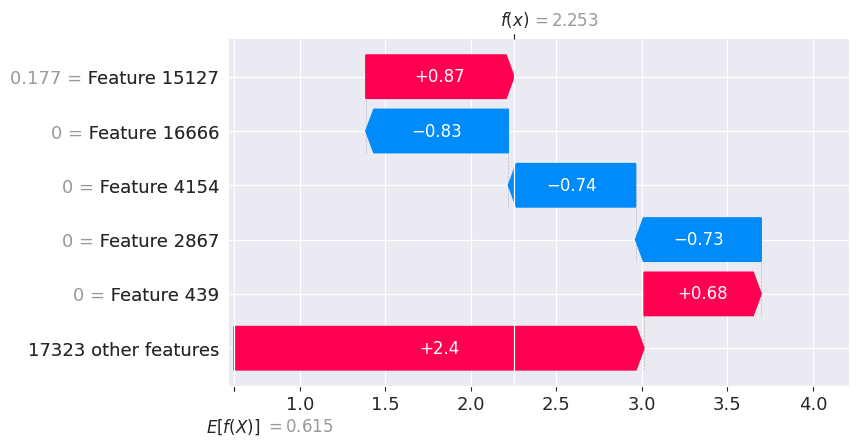

In [ ]:
# Convert the sparse matrix to a DataFrame
X_test_array = X_test.toarray()

# Explain the model's predictions using SHAP
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test_array)

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0], max_display=6)

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. Another way to visualize the same explanation is to use a force plot (these are introduced in our Nature BME paper):

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

If we take many force plot explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive):

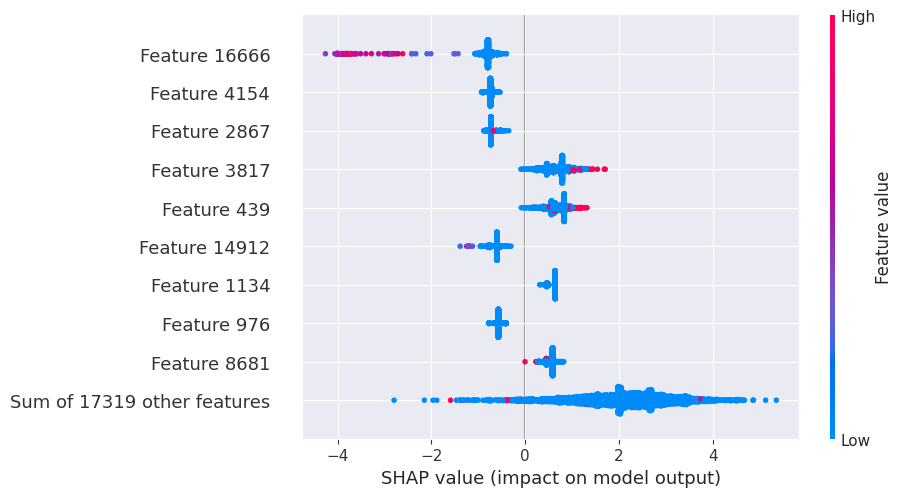

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this Unsupervised ML for Zomato Restaurant Clustering and Sentiment Analysis, I started with EDA of the data. Here I initially performed data wrangling, manipulating the data as required. Further it was analysed and visualized into multiple plots so that we can get better insight into the data and perform Machine Learning with ease.

* In the EDA I grouped the Restaurants and its cost based on distinct Cuisines. Further using different visualizations we can come up with certain conclusions. Such as North Indian and Chinese cuisines are most prefered by customers, since these two are the most served in restuatant.

> B-Dubs can be considered the best restaurant in those collection, it has reasonably low cost and have one of the highest customer ratings. Yet it comes with a limitation, B-Dubs does not offer variety of cuisines like other restaurants in that collection.

> The Lal Street-Bar Exchange has the most highest rated cuisines, and offers wide range of cuisines too, though it is bit over priced, still it serving quality are worth the cost, thus it can be considered as customer's top choice.

> It is also seen that as the cost of the cuisines increase the ratings inceases too, which is predictable since with increase in cost the quality of serving and standard mostly sees positive growth.

* After completing the initial analysis by EDA, and validating necessary hypothesis Machine Learning model is formed. Out of 3 ML models, I chose Content Based Filtering- Recommendation based on User profile and Sentiments instead of Logistic Regression model since it too gave great results with appriciable precision, recall and accuracy.

> The Content Based Filtering was done in two parts, first part was done on by analysing  customers profile and their sentiments towards spefic restaurant. The second part was done by analysing customers reviews.
Modeling with first part showed better results since second part has too many randomness and variables which lowered prediction efficiency.

> Based on Profile and sentiment modeling we can asily predict and recommend which restaurant a specific customer will choose. If we go by customer profile and sentiments it shows 'Beyond Flavours' is recommended most by the Customers such as Anusha, Nillu, Kiran, etc.

***So based on this ML Model we saw how each restaurants are rated grouoed by cuisines, the variety of cuisines each of them offered, and later using ML we can recommend 'Beyond Flavours' as the best restaurant to customers, followed by multiple restaurants such as 'Owm Nom Nom','Olive Garden','Collage - Hyatt Hyderabad Gachibowli',etc.***

--------------------------------------------------------------------END OF UNSUPERVISED MACHINE LEARNING MODEL--------------------------------------------------------------------

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***